<a href="https://colab.research.google.com/github/Anmolsingh1998/Hotel_Booking_Analysis-EDA-Project-_/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT NAME**    -

> ### **HOTEL BOOKING ANALYSIS**







#### **Project Type**    - EDA(Exploratory Data Analysis)
#### **Done By** - ANMOL SINGH


# **Project Summary -**

In this project, we analyzed hotel booking dataset.The dataset contains various columns realated to hotel booking such as is_canceled,lead_time, arrival_date_year,arrival_date_month,arrival_date_week_number, arrival_date_day_of_month,arrival_date_day_of_month, booking_changes, deposit_type, required_car_parking_spaces or various other columns. 

We began our analysis by cleaning and preprocessing the data. We analyzed null values using the msno library, treated missing and duplicate values, and checked unique values for all variables. We also cleaned and treated various columns such as rating, size, install, price, and reviews.

After cleaning the data, we moved on to exploratory data analysis (EDA). we found that Although city Hotel has more bookings, it also has the most number of canceled bookings, BB - Bed & Breakfast is most preferred by customers in both hotels, FB - Full board (breakfast, lunch, and dinner) is less preferred by customers in the city hotel while SC - no meal package is less preferred in Resort hotel, The number of bookings from Portugal country is the highest.

we also found that customer retention is very less by both the hotels, for the city hotel it is 3.11% and for the resort hotel, it is 5.08. Customers stay for longer periods in a Resort hotel Then in a city hotel for each month of the year. To get the best price, the optimal length of stay should be less than 10 days.64.62% of the guests are booking room type "A".As total stay means No. of staying days increases, the adr which is Average Daily Rate decreases. A small group of people prefer to stay for less number of days. Revenue generated from a small group of people is more than the revenue generated from a large group of people. Most of the bookings were canceled for large groups of people if lead time increased. Most of the bookings were canceled if large groups of people are getting long waiting times. As lead time, the number of days that elapsed between the entering date of the booking into the PMS and the arrival date decreases the no. of days in the waiting list decreases.

In conclusion, this analysis provides a comprehensive view of hotel bookings.
 

# **GitHub Link -**

https://github.com/Anmolsingh1998/Hotel_Booking_Analysis-EDA-Project-_.git

# **Problem Statements**




1. What percentage of bookings were cancelled ?
2. Which type of hotel has more booking ?
3. Which meal type is most preferred meal of customers in different Hotels?
4. What is preferred stay length in each hotel?
5. Which month has the highest number of arrivals in each hotel? 
6. From which country people are comming the most ?
7. Which hotel has longer waiting time?
8. Total number of cars Entering both the hotel's premises for each month?
9. Which hotel has a high chance that its customer will return for another stay?
10. What is market segment Wise distribution for both the hotels?
11. Which is the most common channel for booking hotels?
12. The average number of staying days in both hotels for each month?
13. How many singles, couples, multiple adults, family, and babies stays in both hotels each month?
14. Special Request recieved From different market segment?
15. Which is the most reserved room type ?
16. What is the relationship between lead time and the Number Of bookings?



#### **Define Your Business Objective?**

The business objective of this project is to provide doable insights to clients and stakeholders in achieving their goals. By analyzing the hotel booking dataset, the objective is to identify the factors that drive customers' behavior and preferences in hotels, meals, distribution channels, the month of traveling, room type they want, or any special request by them.

The insights gained from this analysis can help clients in business development. The primary objective for many hotels is to maximize revenue, increase occupancy rates, optimize the hotel's distribution channels, minimize cancellations, or gain insights into the competitive landscape which can be done after analyzing this dataset.

# ***Let's Start !***

## **1. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
from datetime import date
import missingno as msno

### Dataset Loading

In [ ]:
# Load Dataset:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_path='/content/drive/MyDrive/MY EDA(HOTEL BOOKING) PROJECT/Hotel Bookings.csv'
df=pd.read_csv(df_path)

### Dataset First View

In [ ]:
# Dataset First Look:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [ ]:
# Analysing Random Rows In Our data Frame:
df.sample(6)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
15407,Resort Hotel,0,142,2015,July,27,2,3,8,2,...,No Deposit,69.0,NaN,0,Contract,89.68,0,0,Check-Out,2015-07-13
51563,City Hotel,1,25,2016,May,21,21,2,1,2,...,No Deposit,9.0,NaN,0,Transient,127.67,0,0,Canceled,2016-05-14
101026,City Hotel,0,11,2016,November,45,2,0,4,2,...,No Deposit,9.0,NaN,0,Transient,119.00,0,0,Check-Out,2016-11-06
108905,City Hotel,0,55,2017,March,13,30,1,3,2,...,No Deposit,9.0,NaN,0,Transient,86.90,0,0,Check-Out,2017-04-03
15419,Resort Hotel,0,189,2015,July,28,9,2,5,2,...,No Deposit,240.0,NaN,0,Transient,99.00,1,0,Check-Out,2015-07-16
90488,City Hotel,0,111,2016,June,24,5,2,0,2,...,No Deposit,14.0,NaN,0,Transient,116.10,0,1,Check-Out,2016-06-07


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count:
df.shape

(119390, 32)

In [ ]:
print(f'No. Of Rows In The Dataframe are {df.shape[0]}')
print(f'No. Of Columns In The Dataframe are {df.shape[1]}')

No. Of Rows In The Dataframe are 119390
No. Of Columns In The Dataframe are 32


### Dataset Information

In [ ]:
# Dataset Info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print(f'No. Of Dupliacte Rows In The Data Frame are {len(df[df.duplicated()])}')

No. Of Dupliacte Rows In The Data Frame are 31994


In [ ]:
# Droping Duplicate Rows From The data Frame:
df=df.drop_duplicates(keep='first')

In [ ]:
#Checking For Dataset Duplicate Value Count:
print(f'No. Of Dupliacte Rows In The DataFrame are {len(df[df.duplicated()])}')

No. Of Dupliacte Rows In The DataFrame are 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count:
df.isna().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [ ]:
# percentage of missing values in each column in playstore dataframe:
((df.isnull().sum()/len(df)).sort_values(ascending=False))*100

company                           93.982562
agent                             13.951439
country                            0.517186
children                           0.004577
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          



1.   The Company column has the highest percentage of missing values (93.98%). This suggests that  Column does not Provide us Enough Information for analysis. So we will Delete this Column.
2.  The Agent column has the significant percentage of missing values (13.95%).Also this column is  not relevent for our analysis, so we are gonna delete this.
3. The columns country and children have a small number of missing values.But they can be important factor for the analysis, so here we are just removing those rows where we have null values in these columns.





Text(0.5, 1.0, 'Non Null  Values in user Dataset')

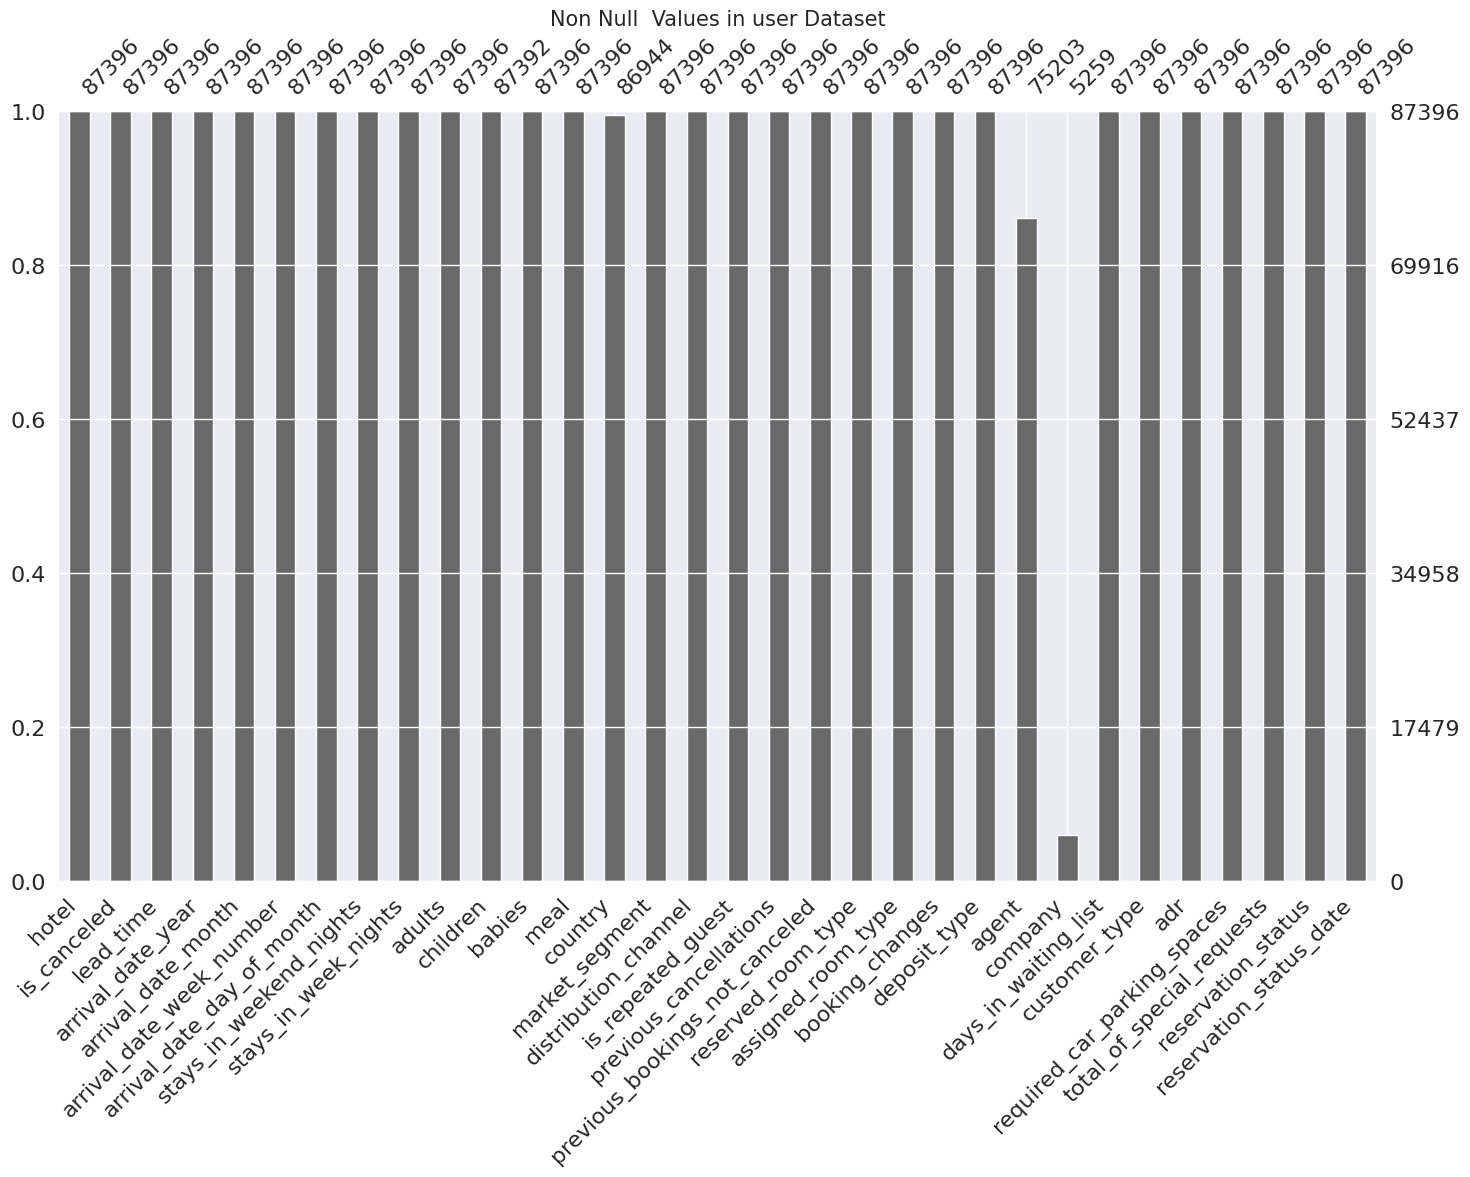

In [ ]:
# Visualizing the missing values:
msno.bar(df,figsize=(17,10))

# Set the title:
plt.title('Non Null  Values in user Dataset', fontsize=15)

<Axes: xlabel='company', ylabel='Count'>

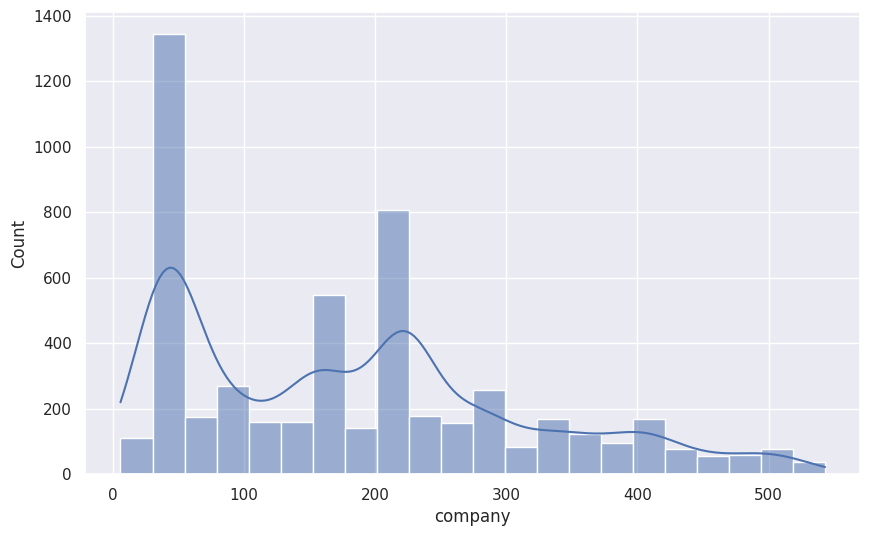

In [ ]:
# Creating hist Plot Using sns.hisplot Function:
# A histogram is a graph that shows the frequency of numerical data using rectangles
sns.histplot(df['company'],kde=True)

<Axes: xlabel='agent', ylabel='Count'>

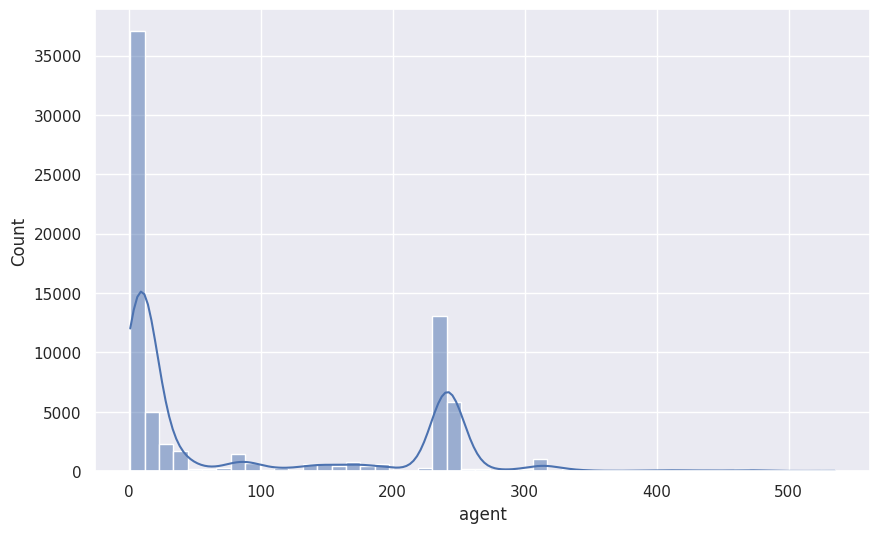

In [ ]:
# Creating hist Plot Using sns.hisplot Function:
sns.histplot(df['agent'],kde=True)

**From The Above graph**

1.   From the histplot visualizations, it is clear that the agents are right skewed.
2.   We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
3. Agent Column contains ID of the travel agency that made the booking which is unique, so we can not replace it with the median.


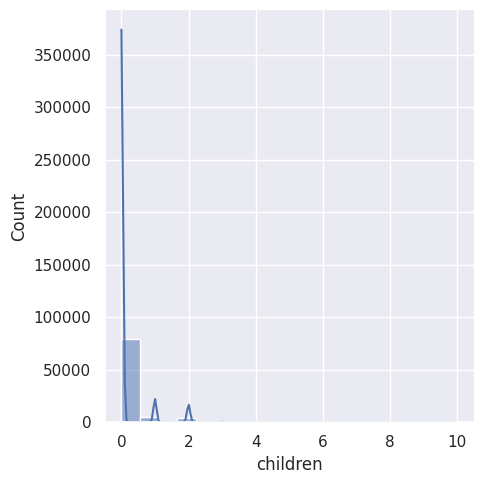

In [ ]:
# Creating Distribution plot Using sns.distplot Function:
# Distribution plot(depicts the variation in the data distribution)
sns.displot(df['children'],kde=True)

**From The Above Graph**

1.   Children column has outliers, so null values can be replaced by the median of data, but replacing null values with median can miss lead us while analyzing our data, so better to delete them.



#### **Handling missing Values/Null Values**

In [ ]:
# Deleting Columns 'Company' , ' Agent' From Data Frame : 
df=df.drop(['company','agent'],axis=1)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Deleting whose rows in column 'country' which has null values in them.
df = df.dropna(axis=0, subset=['country'])

In [ ]:
# Deleting whose rows in column 'children' which has null values in them.
df = df.dropna(axis=0, subset=['children'])

In [ ]:
# Checking for Missing Values/Null Values Count after Rectification 
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

In [ ]:
# There are some rows with total number of 'adults, children or babies' equal to zero. So we will remove such rows:
df[df.adults + df.babies + df.children == 0].shape

(161, 30)

In [ ]:
# Deleting Rows:
df = df.drop(df[(df.adults + df.babies + df.children == 0)].index).reset_index(drop=True)

In [ ]:
#Checking shape of  data Frame:
df.shape

(86779, 30)

## **2. Understanding Your Variables**

In [ ]:
# Dataset Columns:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,86779,2,City Hotel,53267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,86779.0,NaN,NaN,NaN,0.276288,0.447164,0.0,0.0,0.0,1.0,1.0
lead_time,86779.0,NaN,NaN,NaN,80.269397,86.106019,0.0,12.0,50.0,125.0,737.0
arrival_date_year,86779.0,NaN,NaN,NaN,2016.211883,0.685964,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,86779,12,August,11217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,86779.0,NaN,NaN,NaN,26.838613,13.649478,1.0,16.0,27.0,37.0,53.0
arrival_date_day_of_month,86779.0,NaN,NaN,NaN,15.818205,8.834718,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,86779.0,NaN,NaN,NaN,1.00673,1.024252,0.0,0.0,1.0,2.0,16.0
stays_in_week_nights,86779.0,NaN,NaN,NaN,2.627249,2.030063,0.0,1.0,2.0,4.0,40.0
adults,86779.0,NaN,NaN,NaN,1.882011,0.621183,0.0,2.0,2.0,2.0,55.0


### Let us first define what information the columns contain based on our inspection.

1.   **Hotel -**
Hotel (H1 = Resort Hotel or H2 = City Hotel).
2.   **is_canceled -**
Value indicating if the booking was canceled (1) or not (0).
3. **lead_time -**
Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
4. **arrival_date_year -**
Year of arrival date
5.  **arrival_date_month -**
Month of arrival date
6. **arrival_date_week_number**
Week number of year for arrival date
7. **arrival_date_day_of_month -**
Day of arrival date
8. **stays_in_weekend_nights -**
Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
9. **stays_in_week_nights -**
Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
10. **adults -**
Number of adults
11. **children -**
Number of children
12. **babies -**
Number of babies
13. **meal -**
Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner).
14. **country -**
Country of origin. Categories are represented in the ISO 3155–3:2013 format.
15. **market_segment -**
Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
16. **distribution_channel -**
Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.
17. **is_repeated_guest -**
Value indicating if the booking name was from a repeated guest (1) or not (0).
18. **previous_cancellations -**
Number of previous bookings that were cancelled by the customer prior to the current booking.
19. **previous_bookings_not_canceled -**
Number of previous bookings not cancelled by the customer prior to the current booking.
20. **reserved_room_type -**
Code of room type reserved. Code is presented instead of designation for anonymity reasons.
21. **assigned_room_type -**
Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity.
22. **booking_changes -**
Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation.
23. **deposit_type -**
Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.
24. **days_in_waiting_list -**
Number of days the booking was in the waiting list before it was confirmed to the customer.
25. **customer_type -**
Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking.
26. **adr -**
Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights.
27. **required_car_parking_spaces -**
Number of car parking spaces required by the customer.
28. **total_of_special_requests -**
Number of special requests made by the customer (e.g. twin bed or high floor).
29. **reservation_status -**
Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why.
30. **reservation_status_date -**
Date at which the last status was set. This variable can be used in conjunction with the Reservation Status to understand when was the booking canceled or when did the customer checked-out of the hotel.




### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for hotel column
df['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
# Check Unique Values for is_canceled column
df['is_canceled'].unique()


array([0, 1])

In [ ]:
#type of 'is_canceled' column
df['is_canceled'].dtype

dtype('int64')

In [ ]:
# Check Unique Values for lead_time column
df['lead_time'].unique()

array([342, 737,   7,  13,  14,   0,   9,  85,  75,  23,  35,  68,  18,
        37,  12,  72, 127,  78,  48,  60,  77,  99,  95,  96,  69,  45,
        40,  15,  36,  43,  70,  16, 107,  47, 113,  90,  50,  93,  76,
         3,   1,  10,   5,  17,  51,  71,  63,  62, 101,   2,  81, 368,
       364, 324,  79,  21, 109, 102,   4,  98,  92,  26,  73, 115,  86,
        52,  29,  30,  33,  32,   8, 100,  44,  80,  97,  64,  39,  34,
        27,  82,  94, 110, 111,  84,  66, 104,  28, 258, 112,  65,  67,
        55,  88,  54, 292,  83, 105, 280, 394,  24, 103, 366, 249,  22,
        91,  11, 108, 106,  31,  87,  41, 304, 117,  59,  53,  58, 116,
        42, 321,  38, 118,  56,  49, 317,   6,  57,  19,  25, 315, 123,
        46,  89,  61, 312, 299, 130,  74, 298, 119,  20, 286, 136, 129,
       124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135,
       150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160,
       161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 35

In [ ]:
#type of 'lead_time' column
df['lead_time'].dtype

dtype('int64')

In [ ]:
# Check Unique Values for arrival_date_year column
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
# Check Unique Values for arrival_date_month column
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [ ]:
# Check Unique Values for arrival_date_week_number column
df['arrival_date_week_number'].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26])

In [ ]:
# Check Unique Values for arrival_date_day_of_month column
df['arrival_date_day_of_month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [ ]:
# Check Unique Values for stays_in_weekend_nights column
df['stays_in_weekend_nights'].unique()

array([ 0,  1,  2,  4,  3,  6, 13,  8,  5,  7, 12,  9, 16, 10, 14])

In [ ]:
# Check Unique Values for stays_in_week_nights column
df['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 11,  8, 10,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 25, 17, 32, 26, 18, 34])

In [ ]:
# Check Unique Values for stays_in_week_nights column
df['stays_in_week_nights'].unique()

array([ 0,  1,  2,  3,  4,  5, 11,  8, 10,  6,  7, 15,  9, 12, 33, 20, 14,
       16, 21, 13, 30, 19, 24, 40, 22, 25, 17, 32, 26, 18, 34])

In [ ]:
# Check Unique Values for adults column
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55, 20,  6,  5, 10,  0])

In [ ]:
# Check Unique Values for children column
df['children'].unique()

array([ 0.,  1.,  2., 10.,  3.])



1.   We will convert children column of float Datatype into Integer.




In [ ]:
# Check Unique Values for babies column
df['babies'].unique()

array([ 0,  1,  2, 10,  9])

In [ ]:
# Check Unique Values for meal column
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
# Check Unique Values for country column
df['country'].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [ ]:
# Check Unique Values for market_segment column
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [ ]:
# Check Unique Values for distribution_channel column
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
# Check Unique Values for is_repeated_guest column
df['is_repeated_guest'].unique()

array([0, 1])

In [ ]:
# Check Unique Values for previous_cancellations column
df['previous_cancellations'].unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11])

In [ ]:
# Check Unique Values for previous_bookings_not_canceled column
df['previous_bookings_not_canceled'].unique()

array([ 0,  1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 21,
       24, 25, 27, 28, 30, 16, 17, 18, 19, 20, 22, 23, 26, 29, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [ ]:
# Check Unique Values for reserved_room_type column
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'B'], dtype=object)

In [ ]:
# Check Unique Values for iassigned_room_type column
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K'],
      dtype=object)

In [ ]:
# Check Unique Values for booking_changes column
df['booking_changes'].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 14, 15,
       18, 11])

In [ ]:
# Check Unique Values for deposit_type column
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [ ]:
# Check Unique Values for days_in_waiting_list column
df['days_in_waiting_list'].unique()

array([  0,  50,  47,  65, 122,  75, 101, 150, 125,  14,  60,  34, 100,
        22, 121,  61,  39,   5,   1,   8, 107,  43,  52,   2,  11, 142,
       116,  13,  44,  97,  83,   4, 113,  18,  20, 185,  93, 109,   6,
        37, 105, 154,  64,  99,  38,  48,  33,  77,  21,  80,  59,  40,
        58,  89,  53,  49,  69,  87,  91,  57, 111,  79,  98,  85,  63,
        15,   3,  41, 224,  31,  56, 187, 176,  71,  55,  96, 236, 259,
       207, 215, 160, 120,  30,  32,  27,  62,  24, 108, 147, 379,  70,
        35, 178, 330, 223, 174, 162, 391,  68, 193,  10,  76,  16,  28,
         9, 165,  17,  25,  46,   7,  84, 175, 183,  23, 117,  12,  54,
        26,  73,  45,  19,  42,  72,  81,  74, 167,  36])

In [ ]:
# Check Unique Values for customer_type column
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [ ]:
# Check Unique Values for adr column
df['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [ ]:
# Check Unique Values for required_car_parking_spaces column
df['required_car_parking_spaces'].unique()

array([0, 1, 2, 8, 3])

In [ ]:
# Check Unique Values for total_of_special_requests  column
df['total_of_special_requests'].unique()

array([0, 1, 3, 2, 4, 5])

In [ ]:
# Check Unique Values for reservation_status column
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [ ]:
# Check Unique Values for reservation_status_date column
df['reservation_status_date'].unique()

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-05-06',
       '2015-04-22', '2015-06-23', '2015-07-05', '2015-07-06',
       '2015-07-07', '2015-07-08', '2015-05-11', '2015-07-16',
       '2015-05-29', '2015-05-19', '2015-06-19', '2015-05-23',
       '2015-05-18', '2015-07-09', '2015-06-02', '2015-07-13',
       '2015-07-04', '2015-06-29', '2015-06-16', '2015-06-18',
       '2015-06-12', '2015-06-09', '2015-05-26', '2015-07-11',
       '2015-07-12', '2015-07-17', '2015-04-15', '2015-05-13',
       '2015-07-10', '2015-05-20', '2015-05-12', '2015-07-14',
       '2015-06-17', '2015-05-01', '2015-03-30', '2015-07-15',
       '2015-07-19', '2015-06-03', '2015-06-26', '2015-05-14',
       '2015-07-20', '2015-05-07', '2015-05-28', '2015-04-13',
       '2015-03-25', '2015-07-21', '2015-06-27', '2015-07-18',
       '2015-07-23', '2015-06-08', '2015-06-22', '2015-06-24',
       '2015-03-05', '2015-06-01', '2015-04-24', '2015-07-22',
       '2015-05-27', '2015-04-06', '2015-04-11', '2015-

## **3. Data Wrangling**

* **Converting Children column datatype**


In [ ]:
# Converting Children Column datatype into integer:
df['children']=df['children'].astype('int')

*   **Adding New columns**



In [ ]:
# Adding total staying days in hotels:
df['total_stay'] = df['stays_in_weekend_nights']+df['stays_in_week_nights']

In [ ]:
# Adding total people num as column, i.e. total people num = num of adults + children + babies:
df['total_people'] = df['adults']+df['children']+df['babies']

In [ ]:
# Shape after adding Two new coulmns: 
df.shape

(86779, 32)

### What all manipulations have you done and insights you found?



1.   Changed Children data type from Float to integer. 
2.   Added Two new columns, those are

*   total_stay = stays_in_weekend_nights + stays_in_week_nights
*   total_people = adults + children + babies





## **4. Data Vizualization: Understand the relationships between variables**

#### Chart - 1 : What percentage of bookings were cancelled ?


In [ ]:
booking_info_df=pd.DataFrame(df.groupby(['hotel'])['is_canceled'].value_counts())

In [ ]:
#changing column name:
booking_info_df.columns=['no of bookings cancelled']

In [ ]:
# Percentage(Adding new column):
booking_info_df['Percentage']=pd.DataFrame(df.groupby(['hotel'])['is_canceled'].value_counts(normalize=True))*100

In [ ]:
booking_info_df

no of bookings cancelled  Percentage
hotel        is_canceled                                      
City Hotel   0                               37237   69.906321
             1                               16030   30.093679
Resort Hotel 0                               25566   76.289090
             1                                7946   23.710910

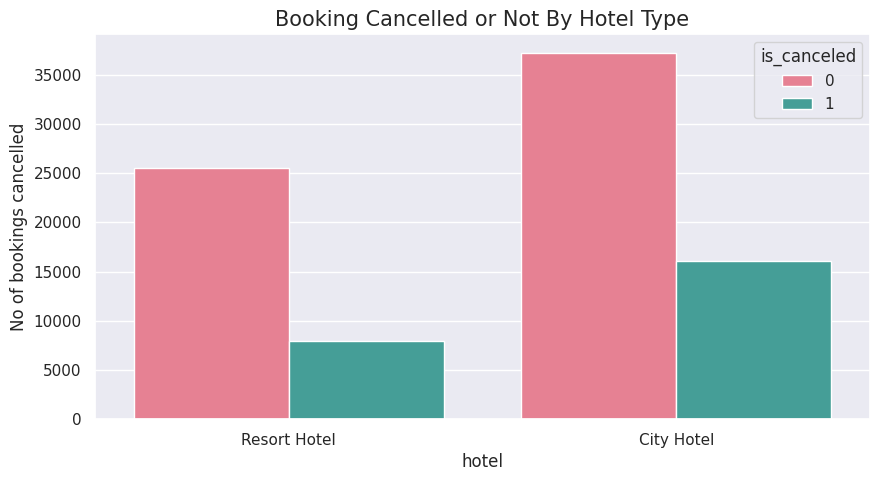

In [ ]:
# Figure size:
plt.rcParams['figure.figsize'] = (10, 5)

# Creating a count plot using the sns.countplot() function:
# hue = Variable in data to map plot aspects to different colors.
# palette = Set of colors for mapping the hue variable. In a dict, keys should be values in the hue variable.
sns.countplot(x='hotel',data=df,hue='is_canceled',palette='husl')

# Set the title, x-label,y-label:
plt.title('Booking Cancelled or Not By Hotel Type',size=15)
plt.xlabel('hotel')
plt.ylabel('No of bookings cancelled')

# Show the plot:
plt.show()




**From The Above Graph**

1.   Although city hotel have more bookings, it also has the most number of canceled bookings.


#### Chart - 2 : Which type of hotel has more booking ?

In [ ]:
more_booking_df=pd.DataFrame(df['hotel'].value_counts())

In [ ]:
#Changing Column Name 
more_booking_df.columns=['No. of Booking']

In [ ]:
#Percentage(Adding new column):
more_booking_df['Percentage']=pd.DataFrame(df['hotel'].value_counts(normalize=True)*100)


In [ ]:
more_booking_df

,No. of Booking,Percentage
City Hotel,53267,61.382362
Resort Hotel,33512,38.617638


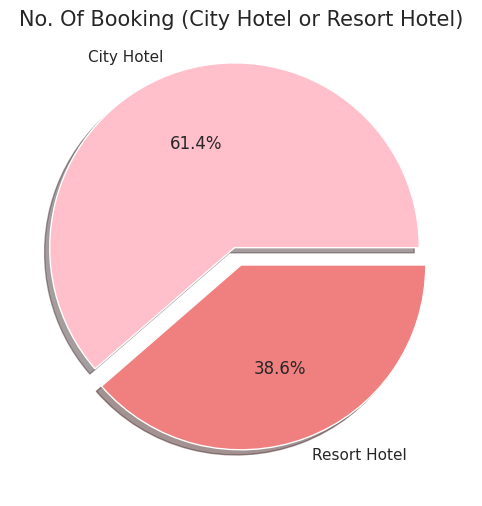

In [ ]:
# Figure Size:
plt.rcParams['figure.figsize'] = (10, 6)

# Get the counts of each hotel (City Hotel or Resort Hotel) in the dataframe:
labels = df['hotel'].value_counts(sort=True).index
sizes = df['hotel'].value_counts(sort=True)

# Define colors for each slice of the pie chart:
colors=['pink','lightcoral']

# Define how much each slice of the pie chart should be separated from the center:
explode = (0.1, 0)

# Creating the pie chart using the plt.pie() function:
# autopct='%1.1f%%' adds the percentage value to each slice
# shadow=True adds a shadow to the pie chart
# startangle=0 sets the starting angle for the first slice to be at 0 degrees (i.e., the 12 o'clock position)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=0)

# Add a title to the pie chart:
plt.title('No. Of Booking (City Hotel or Resort Hotel)',size=15)

# Show the pie chart:
plt.show()

**From The Above Graph**

1.    No. of booking in city Hotel is more than No. of booking in Resort hotel.



#### Chart - 3 :  Which meal type is most preferred meal of customers in different Hotels?

In [ ]:
meals_df=df.groupby(['hotel'])['meal'].value_counts()
meals_df

hotel         meal     
City Hotel    BB           41153
              SC            9317
              HB            2786
              FB              11
Resort Hotel  BB           26338
              HB            6265
              Undefined      488
              FB             349
              SC              72
Name: meal, dtype: int64

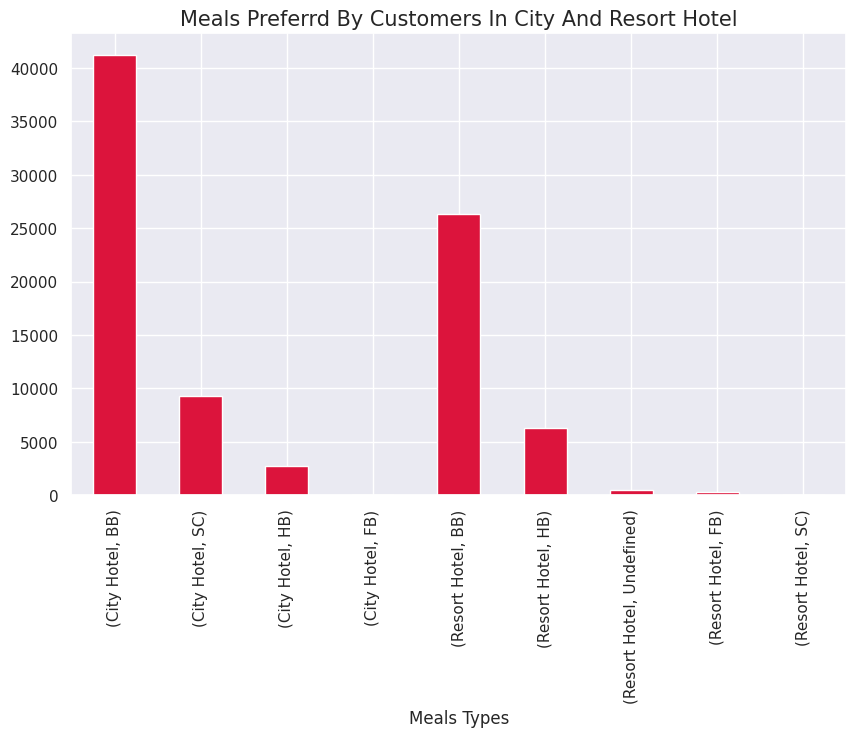

In [ ]:
#Creating a bar graph :
meals_df.plot(kind='bar',color = 'crimson')

# Set the title, x-label
plt.title('Meals Preferrd By Customers In City And Resort Hotel',size=15)
plt.xlabel('Meals Types')

#Show the plot
plt.show()

**From The Above Graph**


1.  BB - Bed & Breakfast is most preferred by customers in both hotels. 
2.  FB - Full board (breakfast, lunch, and dinner) is less preferred by customers in the city hotel while SC - no meal package is less preferred in Resort hotel.




*   **Graph for combined meals preference for customers of different hotels.**





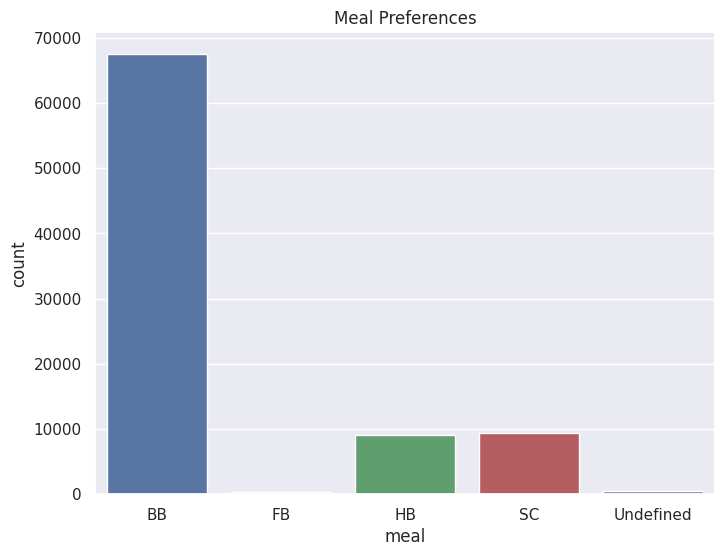

In [ ]:
#Figure Size
plt.figure( figsize=(8, 6))

# Creating a count plot using the sns.countplot() function
sns.countplot(x=df['meal'])

#Plot Title
plt.title('Meal Preferences')

#show the plot
plt.show()

**From The Above Graph**

1.  Most preferred meal type is BB (Bed and breakfast).



#### Chart - 4 : What is preferred stay length in each hotel?

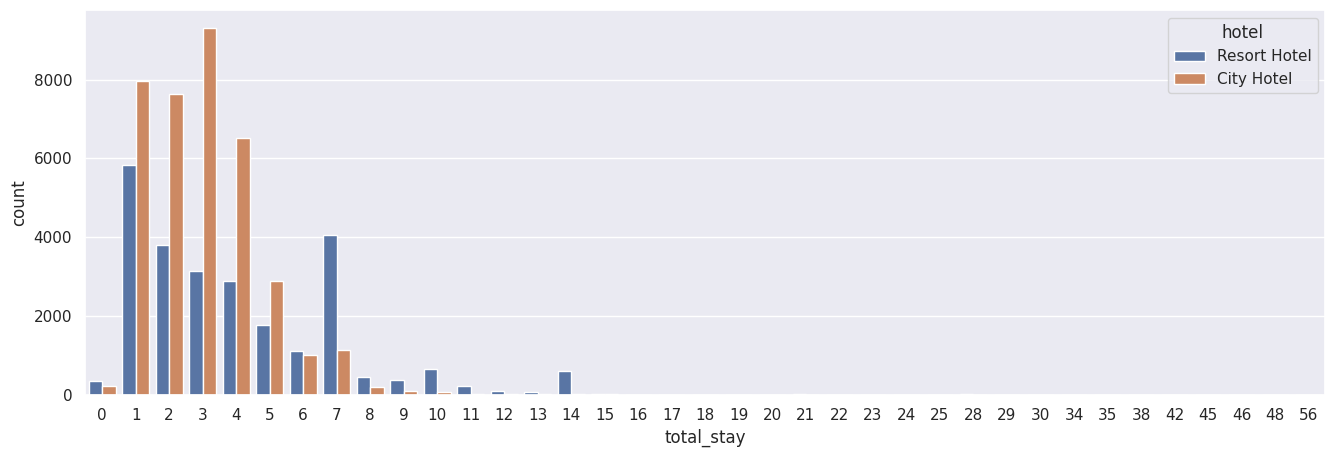

In [ ]:
# Creating database of non canceled booking: 
not_canceled = df[df['is_canceled'] == 0]

#Figure Size:
plt.figure(figsize = (16,5))

# Creating a count plot using the sns.countplot() function:
sns.countplot(x = not_canceled['total_stay'], hue = not_canceled['hotel'])

#show plot:
plt.show()

**From The Above Graph**


1.   The most common stay length is less than 5 days and generally, people prefer City Hotel for short stays, but for long stays, Resort Hotel is preferred.


#### Chart - 5 : Which month has the highest number of arrivals in each hotel?

In [ ]:
# Creating Database From not_canceled database and Grouping it by each hotel:
high_month=not_canceled.groupby(['hotel'])['arrival_date_month'].value_counts()

In [ ]:
high_month

hotel         arrival_date_month
City Hotel    August                4467
              July                  3834
              May                   3656
              June                  3477
              March                 3469
              April                 3325
              September             3166
              October               3070
              February              2618
              November              2175
              December              2019
              January               1961
Resort Hotel  August                3133
              July                  2986
              May                   2234
              October               2163
              March                 2138
              April                 2137
              February              1999
              June                  1915
              September             1850
              November              1706
              December              1672
              January   

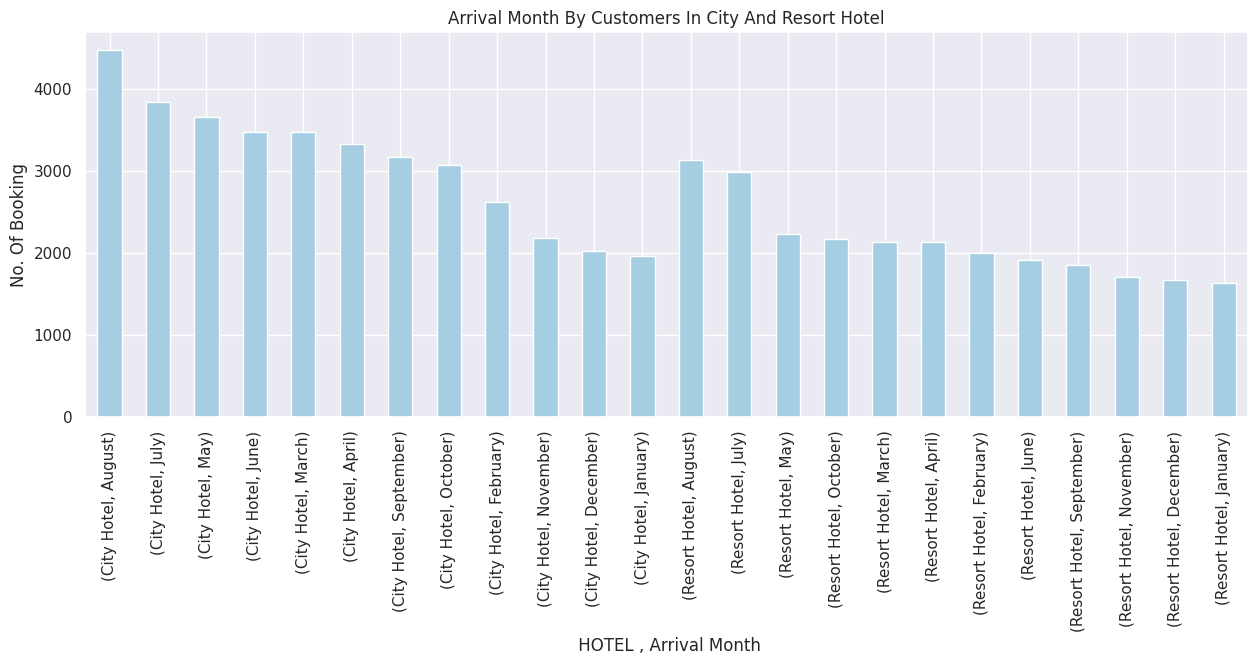

In [ ]:
#Figure Size:
plt.figure(figsize = (15,5))

#Creating a bar graph: 
high_month.plot(kind='bar',colormap='Paired')

# Set the title, x-label,y-label:
plt.title('Arrival Month By Customers In City And Resort Hotel')
plt.xlabel(' HOTEL , Arrival Month')
plt.ylabel('No. Of Booking')

#Show the Plot:
plt.show()

**From The Above Graph**


1.    August has the highest number of arrivals and January has the lowest number of arrivals for each hotel. 
2. There are several factors that could contribute to this trend in some regions or hotels,some of them are:

*   Summer holidays: August is a peak travel period in many parts of the world because it falls during the summer vacation season. Families with school-aged children often plan their trips during this time, leading to increased demand for hotels.

* Weather and tourism seasonality: In many popular tourist destinations, August coincides with pleasant weather and favorable conditions for outdoor activities, attracting more visitors. On the other hand, January is often associated with winter in the Northern Hemisphere, which may deter some travelers, especially those seeking warmer climates or outdoor attractions.

* Festivals and events: Certain regions or cities may host major events, festivals, or conferences during August, driving higher hotel occupancy rates. These events can range from music festivals to sports tournaments or cultural celebrations. Conversely, January tends to have fewer notable events in many places.

* Business and leisure travel patterns: August is a popular time for leisure travel, as families take vacations, and many individuals take advantage of the summer break. In contrast, January often sees a decline in leisure travel due to post-holiday fatigue, as people may have just returned from vacation or are recovering from the expenses of the holiday season. However, January can still witness business-related travel, such as corporate meetings or conferences, which could contribute to hotel occupancy, although generally not to the same extent as during the summer months.





#### Chart - 6 : From which country people are comming the most ?

In [ ]:
#Creating country DataFrame :
country=pd.DataFrame(not_canceled['country'].value_counts())

In [ ]:
# Changing Column Name:
country.columns=['no of bookings']
country

,no of bookings
PRT,17573
GBR,8440
FRA,7091
ESP,5382
DEU,4332
...,...
ZMB,1
SYC,1
MDG,1
SMR,1


In [ ]:
#Creating List, which contains Top 10 values of corresponding country code: 
y=list(not_canceled['country'].value_counts().head(10))
y

[17573, 8440, 7091, 5382, 4332, 2347, 1986, 1670, 1560, 1412]

In [ ]:
#Creating list, which contains Top 10 country code:
x=list(not_canceled['country'].value_counts().head(10).keys())
x

['PRT', 'GBR', 'FRA', 'ESP', 'DEU', 'IRL', 'ITA', 'BEL', 'NLD', 'USA']

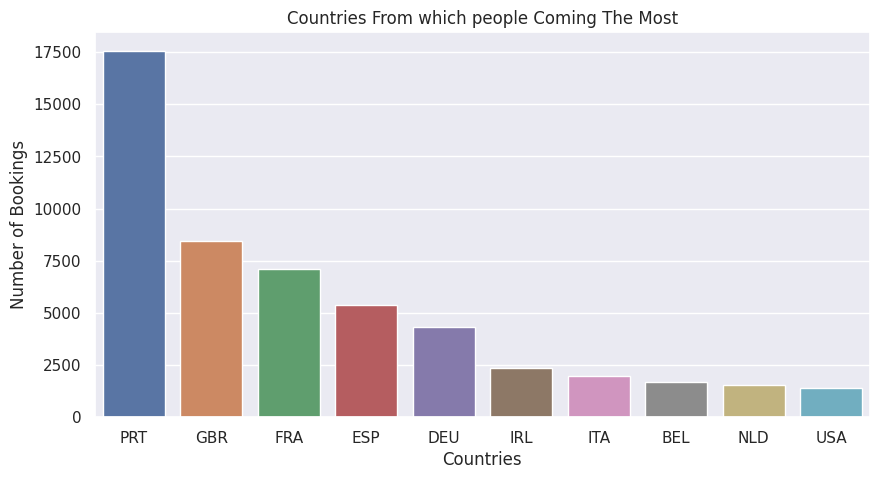

In [ ]:
# Figure Size:
plt.figure(figsize=(10,5))

#Creating bar graph using sns.barplot Function:
sns.barplot(x=list(not_canceled['country'].value_counts().head(10).keys()),y=list(not_canceled['country'].value_counts().head(10)))

# Set the title, x-label,y-label:
plt.title('Countries From which people Coming The Most')
plt.xlabel('Countries')
plt.ylabel('Number of Bookings')

#Show the Plot:
plt.show()

**From The above Graph**


1.   The number of bookings from Portugal country is the highest. 



#### Chart - 7 : Which hotel has longer waiting time?

In [ ]:
#Calculating mean of waiting days for each hotel:
waiting_df=df.groupby(['hotel'])['days_in_waiting_list'].mean().reset_index()

In [ ]:
waiting_df

,hotel,days_in_waiting_list
0,City Hotel,1.02020
1,Resort Hotel,0.32096


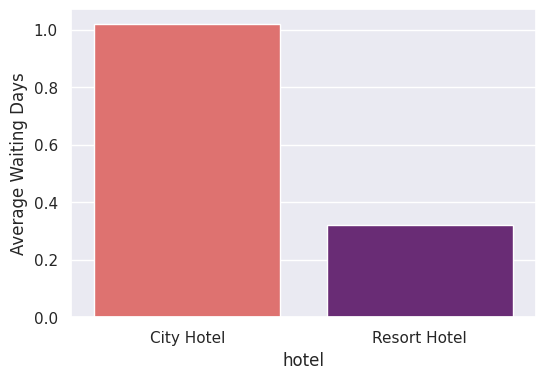

In [ ]:
#Figure Size:
plt.figure(figsize=(6,4))

#Creating bar graph using sns.barplot Function:
sns.barplot(x=waiting_df['hotel'],y=waiting_df['days_in_waiting_list'],palette='magma_r')

# Set the y-label:
plt.ylabel('Average Waiting Days')

#Show Plot:
plt.show()

**From the Above Graph**

1.City Hotel has significantly longer waiting times, hence City Hotel is much busier than Resort Hotel.   



#### Chart - 8 : Total number of cars Entering both the hotel's premises for each month?

In [ ]:
#Calculating Sum of required parking spots for both the hotels for each month:
car_df=not_canceled.groupby(['hotel','arrival_date_month'])['required_car_parking_spaces'].sum().reset_index()


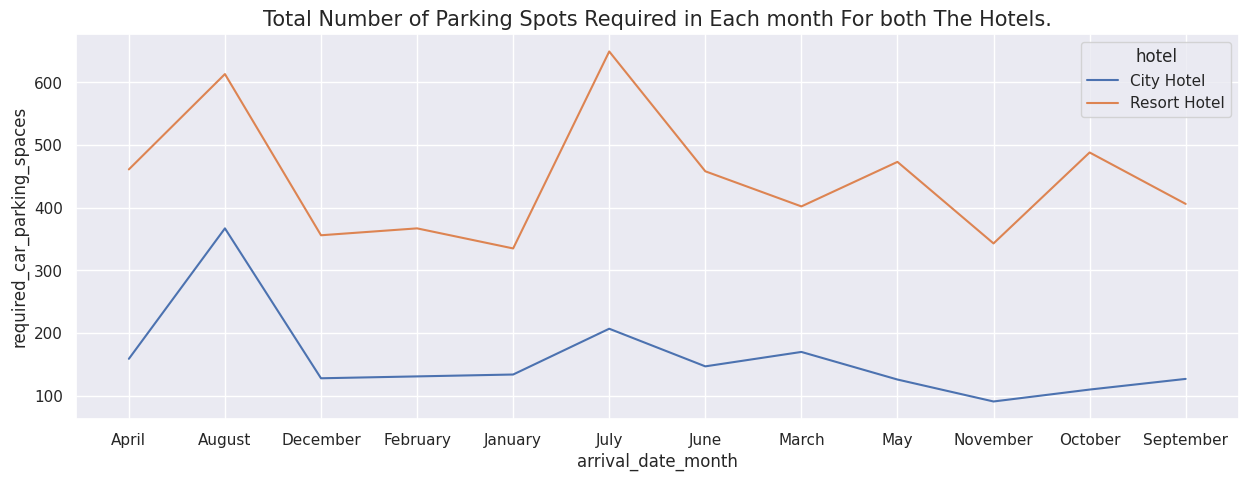

In [ ]:
#Figure Size:
plt.figure(figsize=(15,5))

# Plotting line graph using sns.lineplot Function:
sns.lineplot(x=car_df['arrival_date_month'],y=car_df['required_car_parking_spaces'],data=car_df,hue='hotel')

# Set Tilte 
plt.title('Total Number of Parking Spots Required in Each month For both The Hotels.',size=15)

#Show the Plot:
plt.show()

**From The Above Graph**

1. City Hotel requires fewer parking Spots Then Resort Hotel for each month.   



#### Chart - 9 : Which hotel has a high chance that its customer will return for another stay?

In [ ]:
repeat_df=pd.DataFrame(df.groupby(['hotel'])['is_repeated_guest'].value_counts())

In [ ]:
# Changing Column name:
repeat_df.columns=['no._of_guest']

In [ ]:
# Percentage(Adding new column):
repeat_df['Percentage']=round(pd.DataFrame(df.groupby(['hotel'])['is_repeated_guest'].value_counts(normalize=True))*100,2)

In [ ]:
# Resetting index of our repeat_df DataFrame:
repeat_df.reset_index(inplace=True)

In [ ]:
repeat_df

,hotel,is_repeated_guest,no._of_guest,Percentage
0,City Hotel,0,51610,96.89
1,City Hotel,1,1657,3.11
2,Resort Hotel,0,31809,94.92
3,Resort Hotel,1,1703,5.08


In [ ]:
#Creating New data Frame which contains repated guest from each hotel:
new_repeat_df=repeat_df[repeat_df['is_repeated_guest']==1]

In [ ]:
new_repeat_df

,hotel,is_repeated_guest,no._of_guest,Percentage
1,City Hotel,1,1657,3.11
3,Resort Hotel,1,1703,5.08


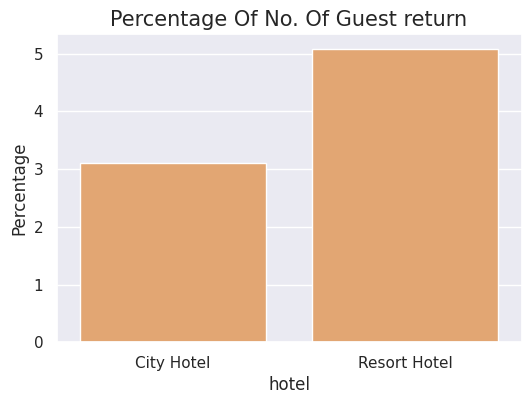

In [ ]:
# Figure Size:
plt.figure(figsize=(6,4))

# Creating a bar graph using sns.barplot Fuction:
sns.barplot(x='hotel',y='Percentage',data=new_repeat_df,color='sandybrown')

#Set the y-label, Title:
plt.title('Percentage Of No. Of Guest return',size=15)

#Show Plot
plt.show()

**From The Above Graph**

1.   Both hotels have a very small percentage that customers will repeat, but the Resort hotel has a slightly higher repeat % than City Hotel.



#### Chart - 10 : What is market segment Wise distribution for both the hotels?

In [ ]:
# Creating data Frame from confirmed booking only:
market_df=pd.DataFrame(not_canceled['market_segment'].value_counts())

In [ ]:
# Resetting index of our market_df DataFrame:
market_df.reset_index(inplace=True)

In [ ]:
#changing columns name:
market_df=market_df.rename(columns={'index':'Market Segment','market_segment':'No_of_Booking'})

In [ ]:
market_df

,Market Segment,No_of_Booking
0,Online TA,33237
1,Offline TA/TO,11772
2,Direct,9900
3,Groups,3585
4,Corporate,3523
5,Complementary,605
6,Aviation,181


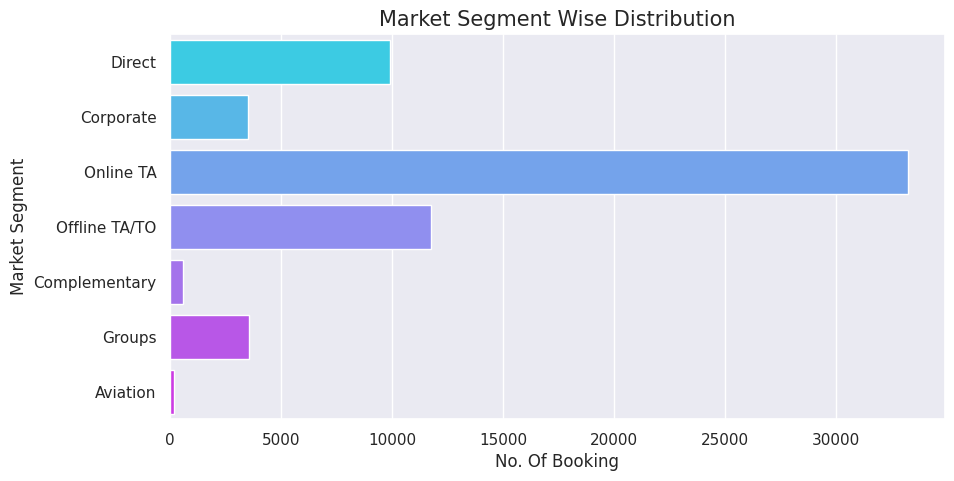

In [ ]:
#Figure size:
plt.figure(figsize=(10,5))

# Creating a count plot using the sns.countplot() function:
sns.countplot(y=not_canceled['market_segment'],data=not_canceled,palette='cool')

#Set The y-label,x-label,title:
plt.xlabel('No. Of Booking')
plt.ylabel('Market Segment')
plt.title('Market Segment Wise Distribution',size=15)

#Show the Plot:
plt.show()

**From The Above graph**

1.   Online TA is the most frequent market segment.



#### Chart - 11 : Which is the most common channel for booking hotels?

In [ ]:
#Creating Data Frame which contains Booking Percentage for different Distribution channel:
channel_df=round(pd.DataFrame(df['distribution_channel'].value_counts(normalize=True))*100,2)
channel_df

,distribution_channel
TA/TO,79.42
Direct,14.74
Corporate,5.63
GDS,0.21
Undefined,0.00


In [ ]:
#Sorting Index:
channel_df.sort_index(inplace=True)

In [ ]:
#Resetting Index:
channel_df.reset_index(inplace=True)

In [ ]:
#Changing Column Names:
channel_df=channel_df.rename(columns={'index':'Distribution Channel','distribution_channel':'Booking Percentage(%)'})

In [ ]:
channel_df

,Distribution Channel,Booking Percentage(%)
0,Corporate,5.63
1,Direct,14.74
2,GDS,0.21
3,TA/TO,79.42
4,Undefined,0.00


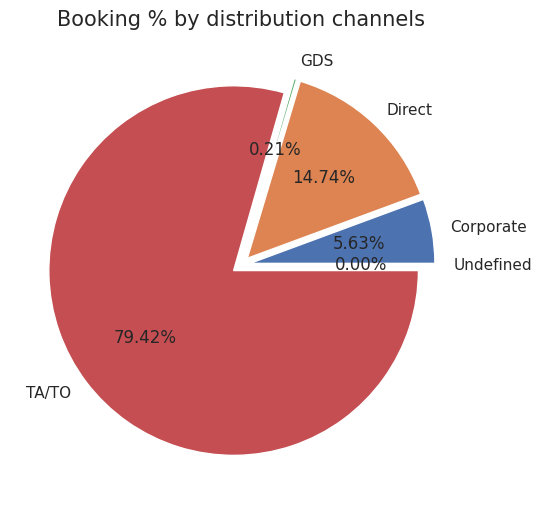

In [ ]:
# Figur Size:
plt.figure(figsize=(10,6))

#Set Data,Labels For Pie Plot:
data = channel_df['Booking Percentage(%)']
labels = channel_df['Distribution Channel']

# Creating the pie chart using the plt.pie() function
# explode, Define how much each slice of the pie chart should be separated from the center
# autopct='%1.1f%%' adds the percentage value to each slice
# startangle=0 sets the starting angle for the first slice to be at 0 degrees (i.e., the 12 o'clock position)
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels,startangle=0)

#Set The Title:
plt.title("Booking % by distribution channels", fontsize=15)

#Show the Plot:
plt.show()

**From The Above Graph**


1.   Distribution channel TA(travel Agents)/TO(Tour Operators) has the highest percentage of 79.42%.


#### Chart - 12 : The average number of staying days in both hotels for each month?

In [ ]:
# Calculating Average No. of Staying Days in both hotels For each Month: 
avg_stay_time=pd.DataFrame(not_canceled.groupby(['hotel','arrival_date_month'])['total_stay'].mean())

In [ ]:
# Resetting the index:
avg_stay_time.reset_index(inplace=True)

In [ ]:
avg_stay_time

,hotel,arrival_date_month,total_stay
0,City Hotel,April,3.065263
1,City Hotel,August,3.206850
2,City Hotel,December,2.970778
3,City Hotel,February,2.904125
4,City Hotel,January,2.855176
5,City Hotel,July,3.204225
6,City Hotel,June,2.876330
7,City Hotel,March,3.039204
8,City Hotel,May,2.842177
9,City Hotel,November,2.977931


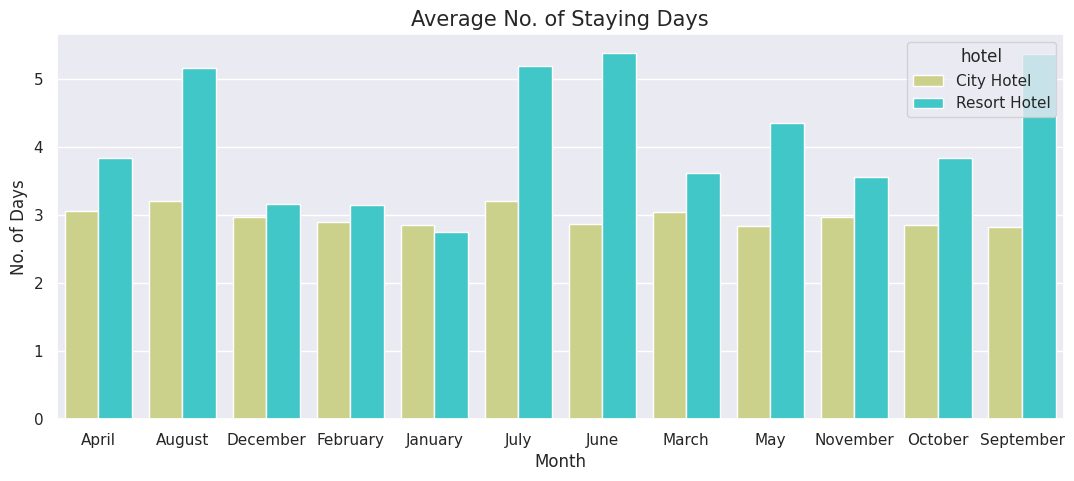

In [ ]:
#Figure Size:
plt.figure(figsize=(13,5))

#Creating Bar Graph using sns.barplot Function:
sns.barplot(x=avg_stay_time['arrival_date_month'],y=avg_stay_time['total_stay'],hue=avg_stay_time['hotel'],palette='rainbow_r')

#set x-label,y-label,title:
plt.xlabel('Month')
plt.ylabel('No. of Days')
plt.title('Average No. of Staying Days',size=15)

#Show the Plot:
plt.show()

**From The Above Graph**


1.   Customers stay for longer periods in a Resort hotel Then in a city hotel for each month of the year.





*   **Let's check What is the optimal length of stay in order to get the best daily rate ?**




In [ ]:
#Adding new column in not_canceled DataFrame:
not_canceled['price']=not_canceled['adr'] * (not_canceled['total_stay'])

<ipython-input-290-bb8b3f250126>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_canceled['price']=not_canceled['adr'] * (not_canceled['total_stay'])


In [ ]:
not_canceled['price']

0           0.00
1           0.00
2          75.00
3          75.00
4         196.00
          ...   
86774     672.98
86775    1578.01
86776    1103.97
86777     730.80
86778    1360.80
Name: price, Length: 62803, dtype: float64

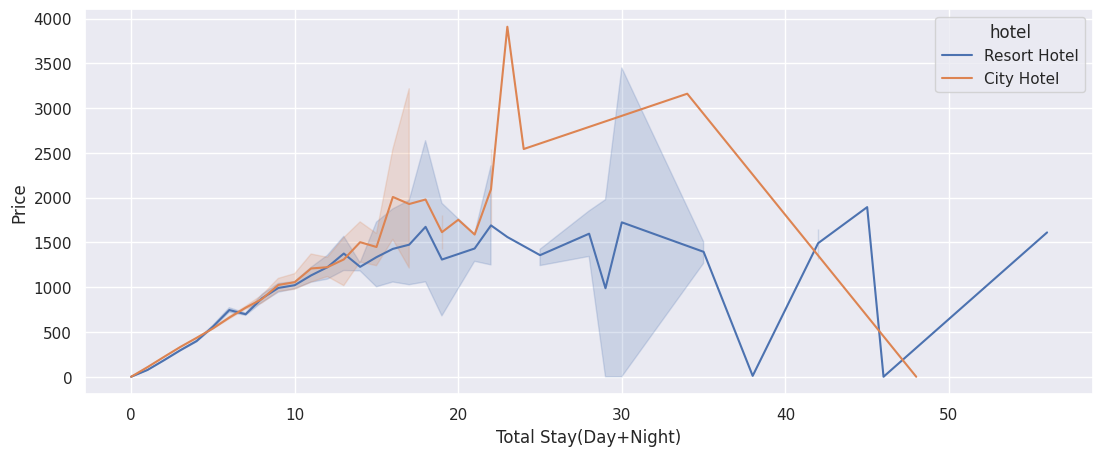

In [ ]:
#Figure Size:
plt.figure(figsize=(13,5))

#Creating Line Graph using sns.lineplot Function:
sns.lineplot(x=not_canceled['total_stay'],y=not_canceled['price'],hue=not_canceled['hotel'])

#Set x-label,y-label:
plt.ylabel('Price')
plt.xlabel('Total Stay(Day+Night)')

#Show Plot:
plt.show()

**From The Above Graph**


1.   To get the best price, the optimal length of stay should be less than 10 days.



#### Chart - 13: How many singles, couples, multiple adults, family, and babies stays in both hotels each month?

In [ ]:
# Creating Different Data Frame:
# Select single, couple, multiple adults and family:
single_df= not_canceled[(not_canceled['adults']==1) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
couple_df= not_canceled[(not_canceled['adults']==2) & (not_canceled['children']==0) & (not_canceled['babies']==0)]
family_df= not_canceled[not_canceled['adults'] + not_canceled['children'] + not_canceled['babies'] > 2]
babies_df=not_canceled[not_canceled['babies']>=1]


In [ ]:
# Creating Sub Data Frames for single, couple, multiple adults,family and babies:
single=pd.DataFrame(single_df.groupby(['arrival_date_month'])['total_people'].sum().reset_index())
couple=pd.DataFrame(couple_df.groupby(['arrival_date_month'])['total_people'].sum().reset_index())
family=pd.DataFrame(family_df.groupby(['arrival_date_month'])['total_people'].sum().reset_index())
babies=pd.DataFrame(babies_df.groupby(['arrival_date_month'])['total_people'].sum().reset_index())

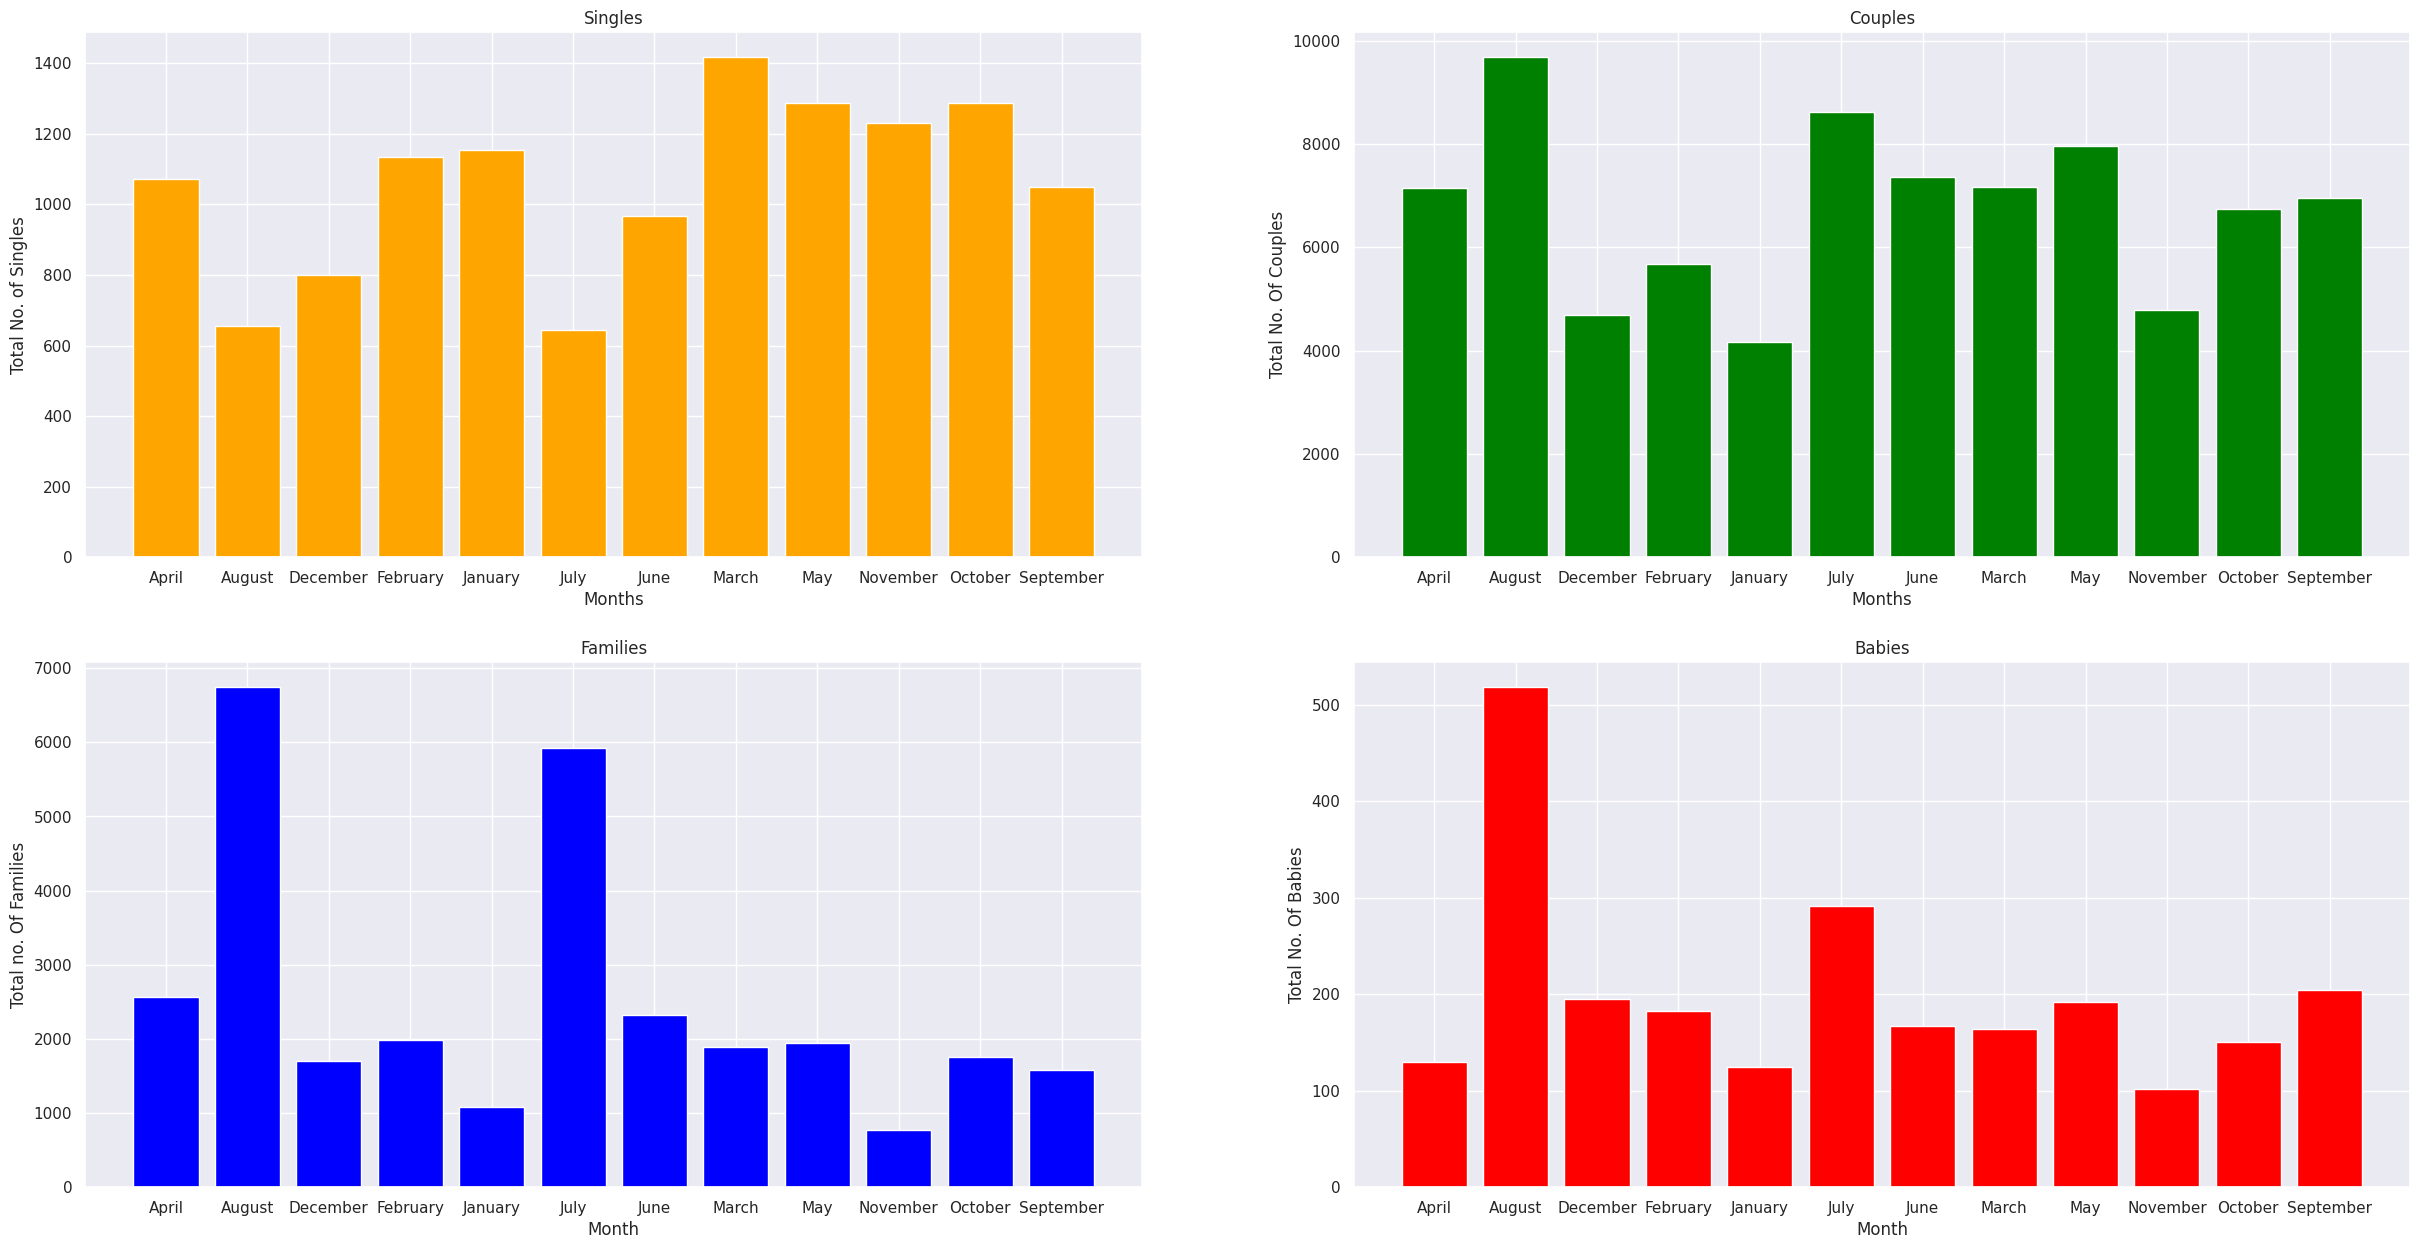

In [ ]:
#set up subplots grid:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(30,15))

# plot for Singles:
axs[0,0].bar(x=single['arrival_date_month'], height=single['total_people'], color='orange')
axs[0,0].set_title('Singles')
axs[0,0].set_xlabel('Months')
axs[0,0].set_ylabel('Total No. of Singles')

# plot for Couples:
axs[0,1].bar(x=couple['arrival_date_month'], height=couple['total_people'], color='green')
axs[0,1].set_title('Couples')
axs[0,1].set_xlabel('Months')
axs[0,1].set_ylabel('Total No. Of Couples')

# plot for Families:
axs[1,0].bar(x=family['arrival_date_month'],height=family['total_people'], color='blue')
axs[1,0].set_title('Families')
axs[1,0].set_xlabel('Month')
axs[1,0].set_ylabel('Total no. Of Families')

# plot for Babies:
axs[1,1].bar(x=babies['arrival_date_month'],height=babies['total_people'], color='red')
axs[1,1].set_title('Babies')
axs[1,1].set_xlabel('Month')
axs[1,1].set_ylabel('Total No. Of Babies')

#Show the Plot:
plt.show()

**From The Above Graph**
1.   It is clear from the graph that there is a sudden surge in the arrival number of couples and families in July and August. So better plans can be planned accordingly at that time for these types of customers.
2. Singles prefer March month for staying in hotels Or we can say for traveling.
3. No. of babies in July and August is high because of couples and families.


#### Chart - 14 : Special Request recieved From different market segment?  

In [ ]:
req_df=pd.DataFrame(df.groupby(['market_segment'])['total_of_special_requests'].unique())

In [ ]:
#Data Frame which contains total no. of special requests from different market segments:
req_df

,total_of_special_requests
market_segment,
Aviation,"[0, 2, 1]"
Complementary,"[1, 0, 2, 3, 4]"
Corporate,"[0, 1, 3, 2, 4]"
Direct,"[0, 1, 2, 3, 4, 5]"
Groups,"[0, 1, 3, 2]"
Offline TA/TO,"[0, 1, 2, 3, 4, 5]"
Online TA,"[1, 0, 3, 2, 4, 5]"


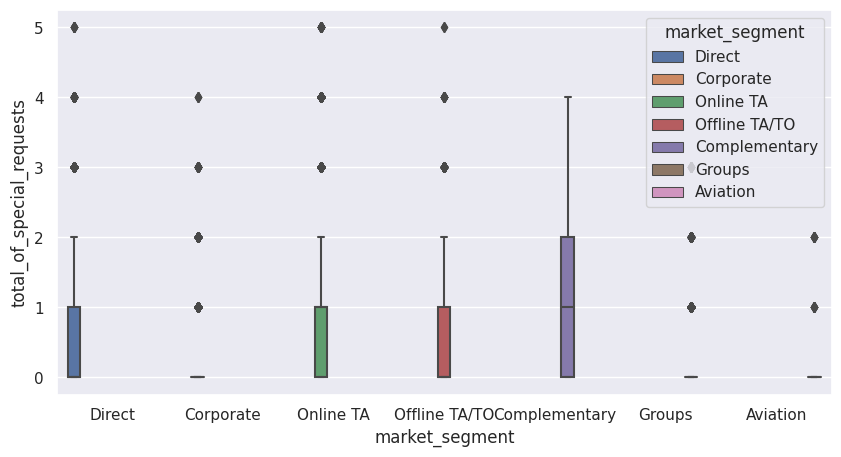

In [ ]:
#Figure Size:
plt.figure(figsize=(10,5))

#Creating Box Plot using sns.boxplot Funtion: 
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df)

#Show the Plot:
plt.show()

**From The Above Graph**

1.   All Market segments have Special Requests.





*   **Let's check the special request According to the Kids in both hotels.**




In [ ]:
#Creating new coulmn named as kids:
df['kids']=df['children']+df['babies']

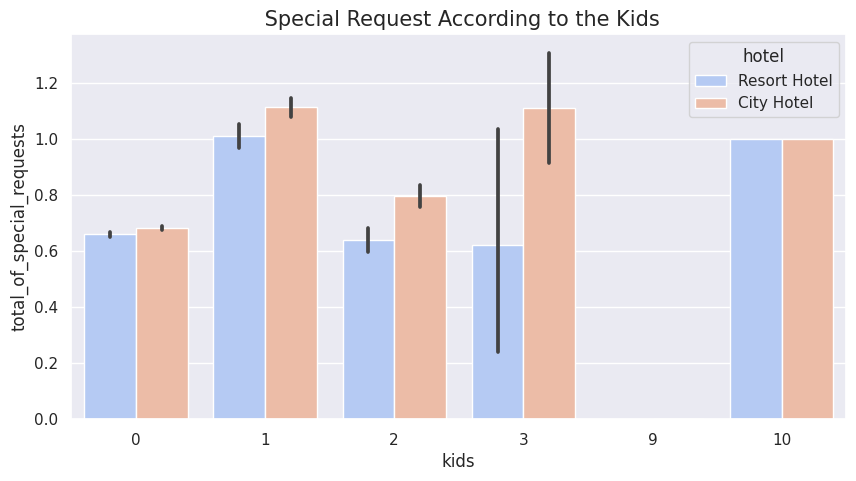

In [ ]:
#Figure Size:
plt.figure(figsize=(10,5))

# Set the style of the plot to be darkgrid
sns.set_theme(style="darkgrid")

#Creating Bar Plot using sns.barplot Function:
sns.barplot(x=df['kids'],y=df['total_of_special_requests'],hue=df['hotel'],palette='coolwarm')

#Set the title:
plt.title(' Special Request According to the Kids',size=15)

#Show the Plot:
plt.show()

#### Chart 15: Which is the most reserved room type ?

In [ ]:
room=pd.DataFrame(round(df['reserved_room_type'].value_counts(normalize=True)*100,2))

In [ ]:
# Sorting Of Index:
room.sort_index(inplace=True)

In [ ]:
# Resetting index:
room.reset_index(inplace=True)

In [ ]:
# Changing column names:
room=room.rename(columns={'index':'Reserved_Room_types','reserved_room_type':'NO. Of Bookings(%)'})

In [ ]:
room

,Reserved_Room_types,NO. Of Bookings(%)
0,A,64.62
1,B,1.14
2,C,1.05
3,D,19.99
4,E,6.91
5,F,3.24
6,G,2.35
7,H,0.69
8,L,0.01


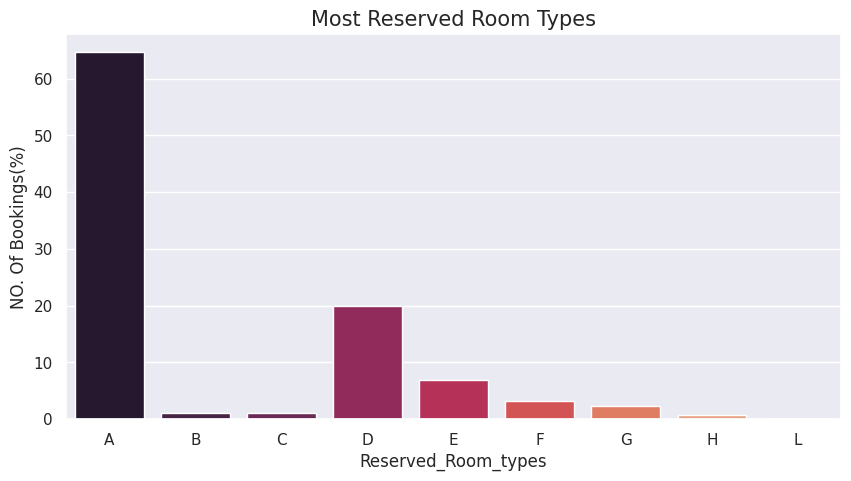

In [ ]:
# Figure Size:
plt.figure(figsize=(10, 5))

#Creating Bar Graph using sns.barplot Function:
sns.barplot(x=room['Reserved_Room_types'],y=room['NO. Of Bookings(%)'],palette='rocket')

#Set the title:
plt.title('Most Reserved Room Types',size=15)

#Show  the Plot:
plt.show()

**From The Above Graph**

1.   64.62% of the guests are booking room type "A".



#### Chart 16: What is the relationship between lead time and the Number Of bookings?

In [ ]:
ltcount_df=pd.DataFrame(df['lead_time'].value_counts())

In [ ]:
# Resetting The index:
ltcount_df.reset_index(inplace=True)

In [ ]:
# Changing the coulmn names:
ltcount_df=ltcount_df.rename(columns={'index':'lead_time','lead_time':'no. of bookings'})

In [ ]:
ltcount_df

,lead_time,no. of bookings
0,0,5795
1,1,3136
2,2,1887
3,3,1689
4,4,1547
...,...,...
474,410,1
475,411,1
476,371,1
477,532,1


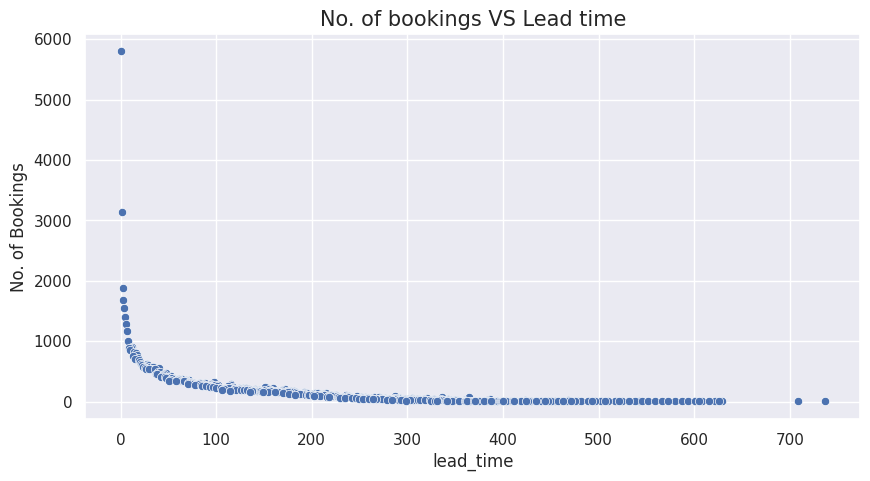

In [ ]:
#Figure Size:
plt.figure(figsize=(10,5)) 

# Creating Scatter Plot Using sns.scatterplot Fuction:
sns.scatterplot(x=ltcount_df['lead_time'],y=ltcount_df['no. of bookings'])

# Set the y-label,Title:
plt.title('No. of bookings VS Lead time',size=15)
plt.ylabel('No. of Bookings')

#Show the Plot:
plt.show()

**From The Above Graph**


1.   As Lead time increases the number of booking decreases.






*   **Now Let's Check the relationship between lead time and cancellation.**



In [ ]:
#Creating Data frame which describe cacellation about lead time:
time_cancel_df=pd.DataFrame(df.groupby(['lead_time'])['is_canceled'].describe())

In [ ]:
time_cancel_df

,count,mean,std,min,25%,50%,75%,max
lead_time,,,,,,,,
0,5795.0,0.059016,0.235676,0.0,0.0,0.0,0.0,1.0
1,3136.0,0.066008,0.248335,0.0,0.0,0.0,0.0,1.0
2,1887.0,0.094860,0.293099,0.0,0.0,0.0,0.0,1.0
3,1689.0,0.100059,0.300168,0.0,0.0,0.0,0.0,1.0
4,1547.0,0.097608,0.296880,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
622,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
626,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
629,2.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [ ]:
# Cancellation Percentage(%):
time_cancel_df['mean']*100

lead_time
0        5.901639
1        6.600765
2        9.485957
3       10.005921
4        9.760827
          ...    
622    100.000000
626    100.000000
629    100.000000
709      0.000000
737      0.000000
Name: mean, Length: 479, dtype: float64

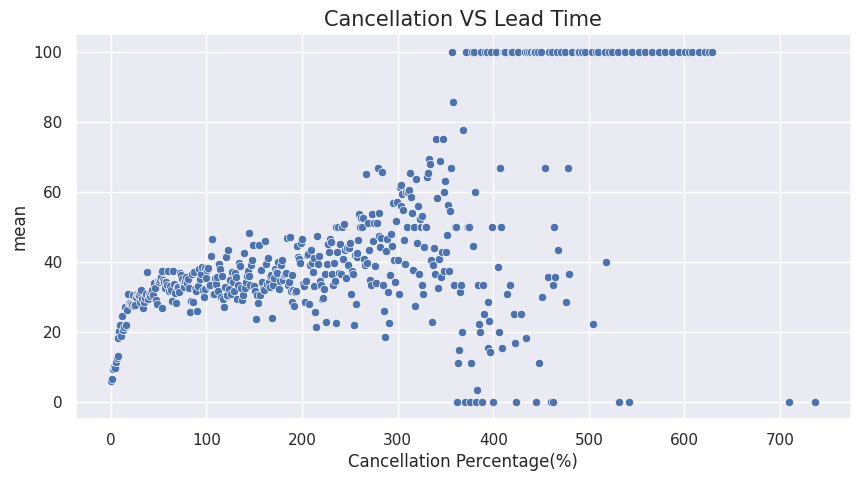

In [ ]:
#Figure Size:
plt.figure(figsize=(10,5))

# Creating scatter plot using sns.scatterplot Function:
sns.scatterplot(x=time_cancel_df.index,y=(time_cancel_df['mean']*100))

#Set the title:
plt.title('Cancellation VS Lead Time',size=15)
plt.xlabel('Cancellation Percentage(%)')

#Show the Plot:
plt.show()

**From The Above Graph**

1.   Lead time has a positive correlation with cancellation. It means that the higher the lead time, the higher the chances of cancellation of booking.




#### Chart - 17 - Correlation Heatmap



*   Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', are categorical data having numerical type. So we wont need to check them for correlation.



In [ ]:
heat_df=df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


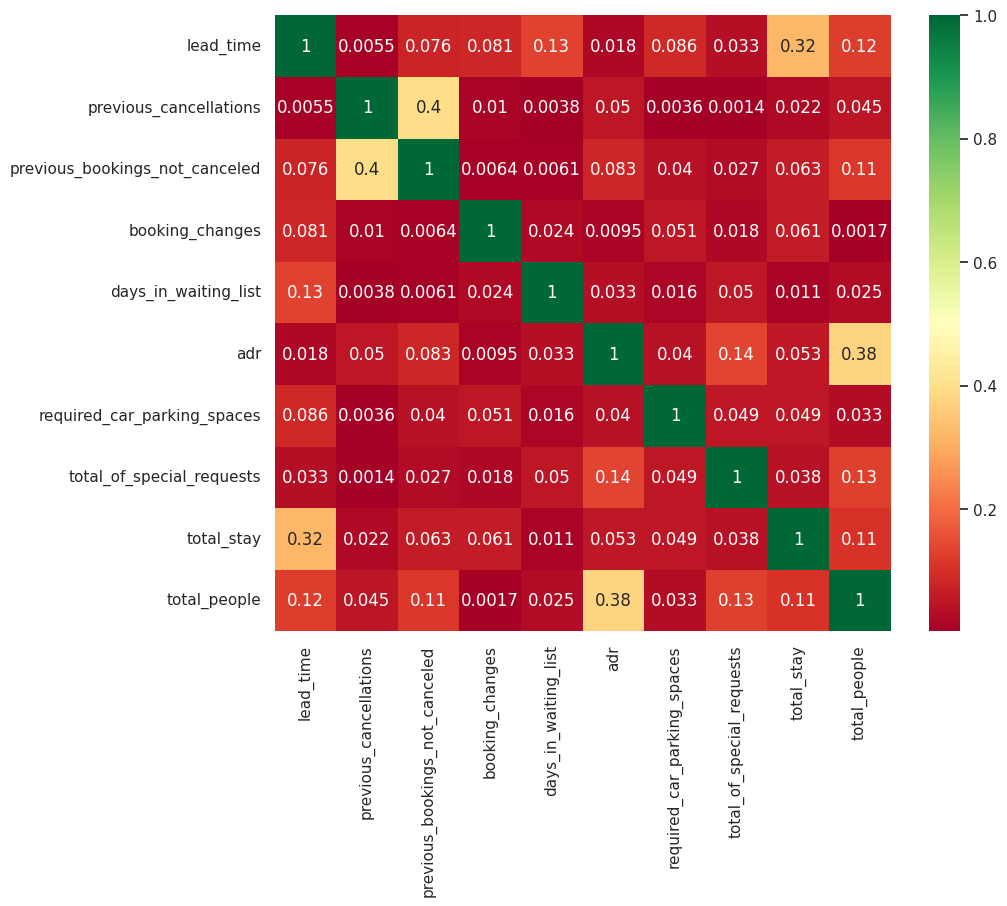

In [ ]:
# Correlation Heatmap visualization code:
# cmap = colormap,The mapping from data values to color space
#annot = If True, write the data value in each cell
#squre = If True, set the Axes aspect to “equal” so each cell will be square-shaped
plt.figure(figsize=(10,8))
sns.heatmap(abs(heat_df.corr()),annot=True,cmap='RdYlGn',square=True)

#Show the plot:
plt.show()

**From The Above Graph**
1. Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

2. adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

**Let's see does length of stay affects the adr.**

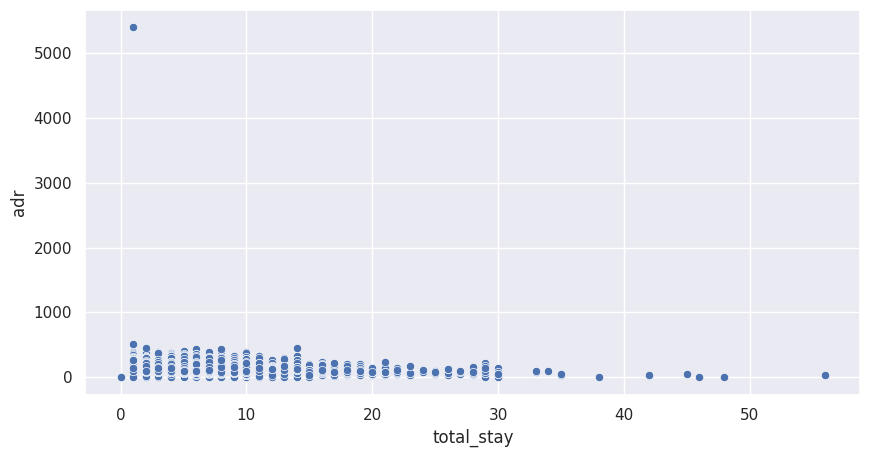

In [ ]:
# Figure size:
plt.figure(figsize = (10,5))

# Creating Scatter Plot Using sns.scatterplot Function:
sns.scatterplot(y = df['adr'], x = df['total_stay'], data = df)

#Show the Plot:
plt.show()

We notice that there is an outlier in adr, so we will remove that for a better scatter plot.

In [ ]:
# Deleting outlier:
df=df.drop(df[df['adr'] > 5000].index)

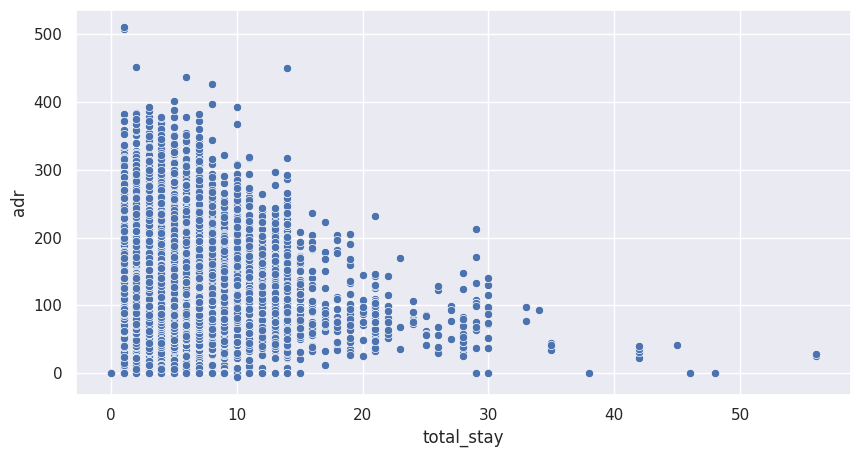

In [ ]:
# Figure Size:
plt.figure(figsize = (10,5))

#Creating Scatter Plot Using sns.scatterplot Function:
sns.scatterplot(y = df['adr'], x = df['total_stay'], data = df)

#Show the Plot:
plt.show()

**From The Above Graph**


1.   Length of total_stay increases the adr decreases. This means for a longer stay, a better deal for the customer can be finalized.



#### Chart - 18 - Pair Plot 

In [ ]:
# Creating Data Frame for Pair plot:
pair_df=df[['total_people','lead_time','booking_changes','days_in_waiting_list','adr','total_stay','is_canceled']]

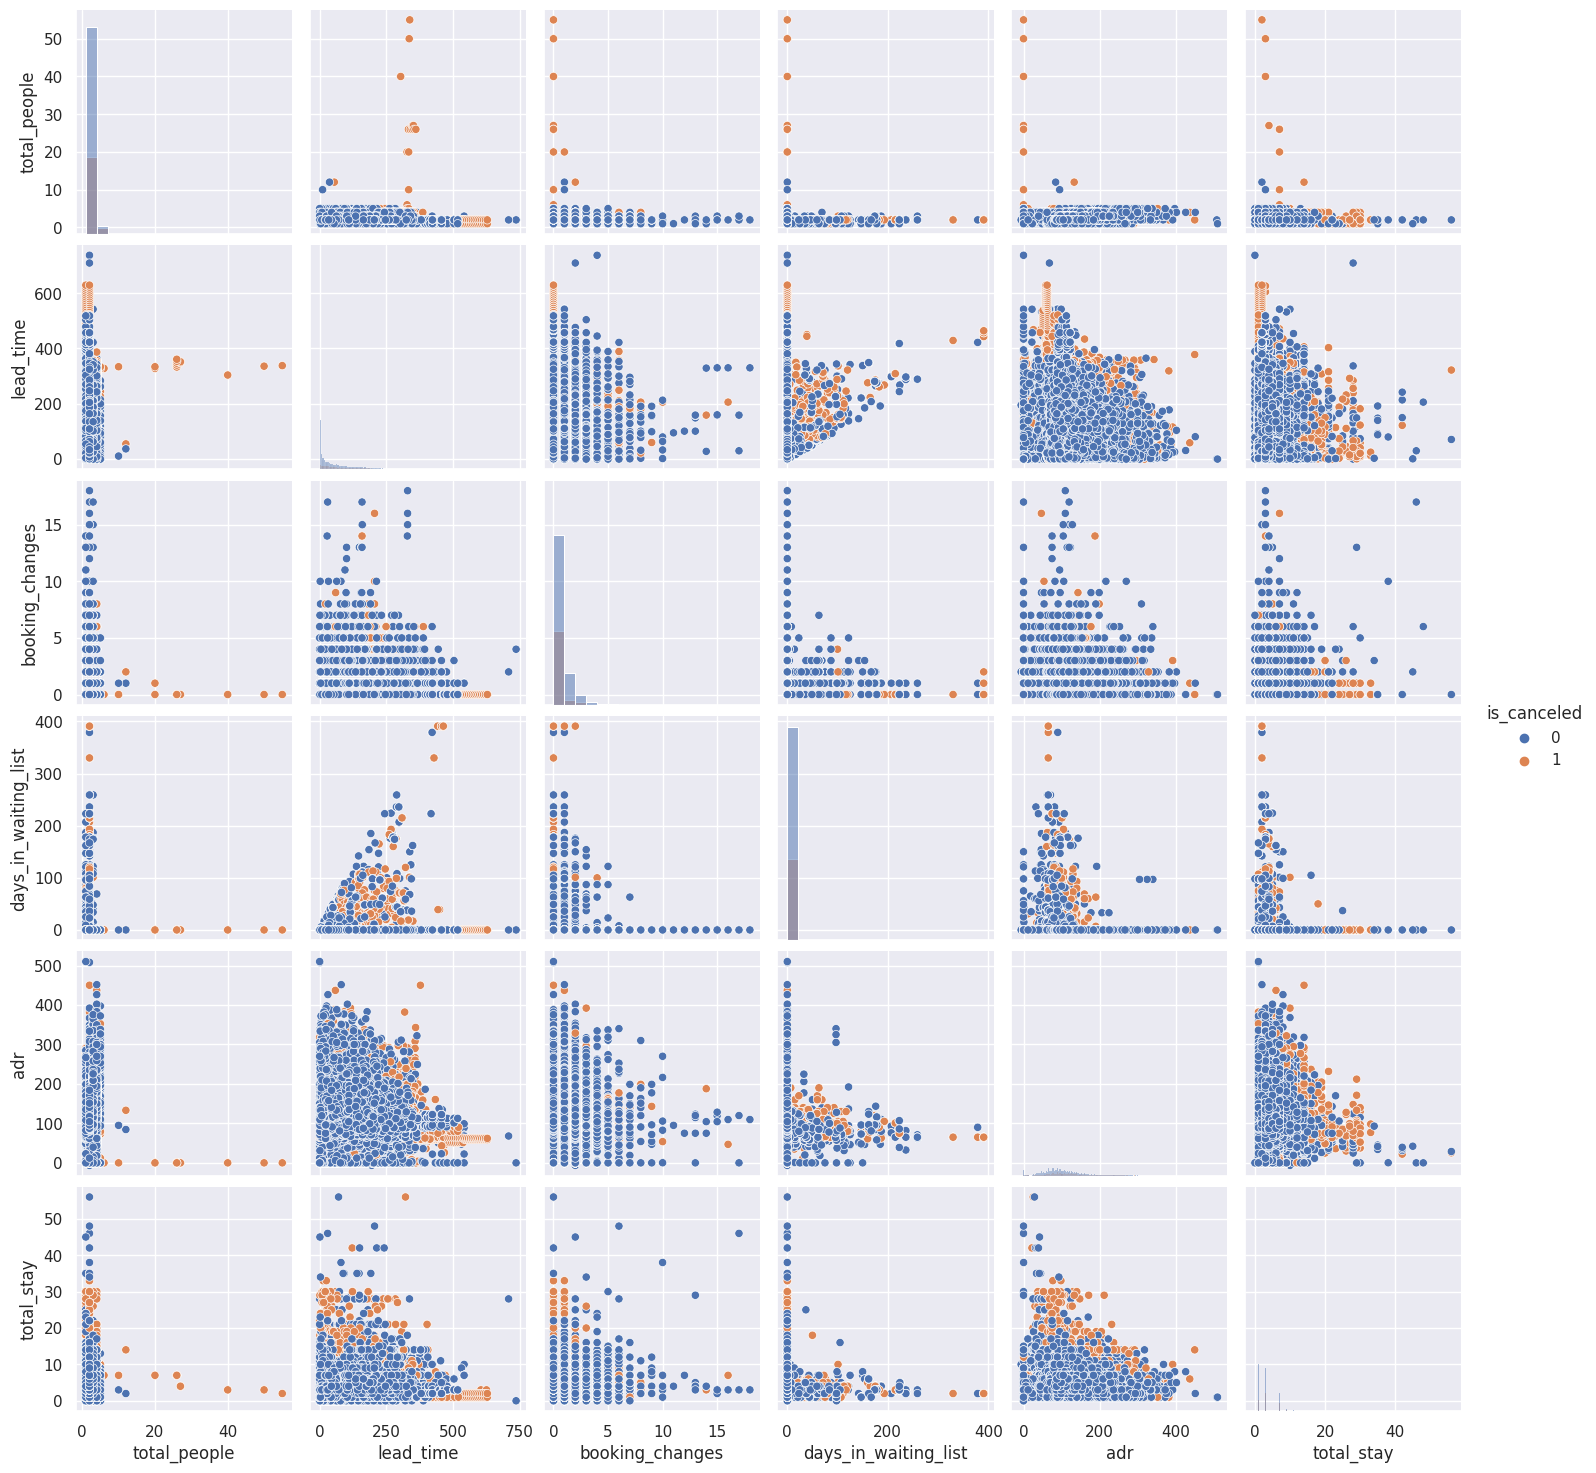

In [ ]:
# Creating Pair Plot using sns.pairplot function:
# diag_kind parameter determines the diagonal plotting style i.e. equals to hist(histogram)
sns.pairplot(pair_df,hue='is_canceled', diag_kind="hist")

#Show The Plot:
plt.show()

**From the Above Pair Plot**


1.   As total stay means No. of staying days increases, the adr which is Average Daily Rate decreases.
2.  A small group of people prefer to stay for less number of days.
3.  Revenue generated from a small group of people is more than the revenue generated from a large group of people. 
4. Most of the bookings were canceled for large groups of people if lead time increased.
5. Most of the bookings were canceled if large groups of people are getting long waiting times.
6. As lead time, the number of days that elapsed between the entering date of the booking into the PMS and the arrival date decreases the no. of days in the waiting list decreases.




## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

1. Strategies to Counter High Cancellations at the Hotel
* Set Non-refundable Rates, Collect deposits, and implement more rigid cancellation policies.
* Encourage Direct bookings by offering special discounts
* Monitor where the cancellations are coming from such as Market Segment, distribution channels, etc.
2. The majority of the hotels booked are city hotels. Need to spend the most targeting fund on those hotels.
3. The majority of the guests are from Western Europe. Clients should spend a significant amount of our budget on those areas.Recommend strategies to expand the hotel's reach and attract new customers, such as 
* targeting specific demographics.
* creating packages tailored to niche markets.
* exploring partnerships with local businesses or event organizers
4.  Given that hotels do not have repeated guests,strategies to improve customer retention, such as 
* implementing a loyalty program. 
* providing incentives for direct bookings.
* enhancing the overall customer experience to encourage repeat visits. 
* the Client should target advertisements on guests to increase returning guests.
*  Create attractive packages and experiences that set the hotel apart from competitors.
5. The client should target months between May to Aug. Those are peak months due to the summer period.
6. As Distribution channel TA(travel Agents)/TO(Tour Operators) has the highest percentage of 79.42%.Recommend strategies to optimize other booking channels, such as 
* incentivizing direct bookings through exclusive offers.
* improving partnerships with high-performing online websites.



## **6.Conclusion**

1.    August has the highest number of arrivals and January has the lowest number of arrivals for each hotel.There are several factors that could contribute to this trend in some regions or hotels,some of them are:
*   Summer holidays: August is a peak travel period in many parts of the world because it falls during the summer vacation season. Families with school-aged children often plan their trips during this time, leading to increased demand for hotels.

* Weather and tourism seasonality: In many popular tourist destinations, August coincides with pleasant weather and favorable conditions for outdoor activities, attracting more visitors. On the other hand, January is often associated with winter in the Northern Hemisphere, which may deter some travelers, especially those seeking warmer climates or outdoor attractions.

* Festivals and events: Certain regions or cities may host major events, festivals, or conferences during August, driving higher hotel occupancy rates. These events can range from music festivals to sports tournaments or cultural celebrations. Conversely, January tends to have fewer notable events in many places.

* Business and leisure travel patterns: August is a popular time for leisure travel, as families take vacations, and many individuals take advantage of the summer break. In contrast, January often sees a decline in leisure travel due to post-holiday fatigue, as people may have just returned from vacation or are recovering from the expenses of the holiday season. However, January can still witness business-related travel, such as corporate meetings or conferences, which could contribute to hotel occupancy, although generally not to the same extent as during the summer months.
2. Distribution channel TA(travel Agents)/TO(Tour Operators) has the highest booking percentage.
3. Although city hotel have more bookings, it also has the most number of canceled bookings.
4. BB - Bed & Breakfast is most preferred by customers in both hotels.
5. The most common stay length is less than 5 days and generally, people prefer City Hotel for short stays, but for long stays, Resort Hotel is preferred.
6. As City Hotel has significantly longer waiting times, hence City Hotel is much busier than Resort Hotel.
7. City Hotel requires fewer parking Spots Then Resort Hotel for each month.
8. The majority of the guests are from Western Europe.
9. Customers stay for longer periods in a Resort hotel Then in a city hotel for each month of the year.
10. All Market segments have Special Requests.
11. Most of the guests are booking room type "A".
12. Higher the lead time, the higher the chances of cancellation of booking.
13. For longer hotel stays people generally plan little before the the actual arrival.
14. For a longer stay, a better deal for the customer can be finalized.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***